In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import timedelta
import ast

# 모든 테이블 전처리 요소 확인

## 1. hackle

In [2]:
device_properties = pd.read_csv('./dumps/hackle_csv/device_properties.csv')
hackle_events = pd.read_csv('./dumps/hackle_csv/hackle_events.csv')
hackle_properties = pd.read_csv('./dumps/hackle_csv/hackle_properties.csv')
user_properties = pd.read_csv('./dumps/hackle_csv/user_properties.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29884\2457705763.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_properties = pd.read_csv('./dumps/hackle_csv/user_properties.csv')


### 1-1. device_properties

In [4]:
device_properties.head(5)

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple


- 결측값 확인

In [33]:
# 결측값 없음
device_properties.isnull().sum()

id               0
device_id        0
device_model     0
device_vendor    0
dtype: int64

In [220]:
device_properties['device_id'].nunique()

251720

- 중복값 확인

In [40]:
# 전체 중복값 없음 (id 빼고 확인)
columns = ['device_id',	'device_model',	'device_vendor']

device_properties[device_properties[columns].duplicated(keep=False)]

,id,device_id,device_model,device_vendor


In [10]:
# device_id 중복값 있음 
# 전체 1320개 -> keep='first'하면 660개 (2개씩 중복)
device_properties[device_properties['device_id'].duplicated(keep=False)]

,id,device_id,device_model,device_vendor
16,17,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-A325N,samsung
17,18,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-S911N,samsung
704,705,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A546S,samsung
705,706,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A716S,samsung
1718,1719,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone12,8",Apple
...,...,...,...,...
250799,250800,fe599a47-85ad-467b-b3e5-ec557117ec80,SM-G991N,samsung
251274,251275,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone12,8",Apple
251275,251276,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone13,1",Apple
252293,252294,ffeae563-c45e-4f68-85e0-f0373dd940cf,SM-A235N,samsung


In [38]:
# 맨 마지막 id일수록 최신인가?

# 이부분은 ai의 힘을 빌림
device_model_info = [
    # Samsung S Series
    ['SM-G935K', 2016, 1], ['SM-G950N', 2017, 2], ['SM-G960N', 2018, 1],
    ['SM-G965N', 2018, 1], ['SM-G970N', 2019, 1], ['SM-G973N', 2019, 1],
    ['SM-G975N', 2019, 1], ['SM-G977N', 2019, 2], ['SM-G981N', 2020, 1],
    ['SM-G986N', 2020, 1], ['SM-G986B', 2020, 1], ['SM-G988N', 2020, 1],
    ['SM-G781N', 2020, 4], ['SM-G991N', 2021, 1], ['SM-G996N', 2021, 1],
    ['SM-G998N', 2021, 1], ['SM-S901N', 2022, 1], ['SM-S908N', 2022, 1],
    ['SM-S911N', 2023, 1], ['SM-S916N', 2023, 1], ['SM-S918N', 2023, 1],

    # Samsung Note & Z Series
    ['SM-N935K', 2017, 3], ['SM-N935S', 2017, 3], ['SM-N950N', 2017, 3],
    ['SM-N950F', 2017, 3], ['SM-N960N', 2018, 3], ['SM-N971N', 2019, 3],
    ['SM-N976N', 2019, 3], ['SM-N981N', 2020, 3], ['SM-N986N', 2020, 3],
    ['SM-F700N', 2020, 1], ['SM-F707N', 2020, 3], ['SM-F711N', 2021, 3],
    ['SM-F926N', 2021, 3], ['SM-F721N', 2022, 3], ['SM-F936N', 2022, 3],
    ['SM-F731N', 2023, 3], ['SM-F946N', 2023, 3],

    # Samsung A / M / E Series
    ['SM-A710L', 2016, 1], ['SM-A530N', 2018, 1], ['SM-G885S', 2018, 2],
    ['SM-G611K', 2018, 1], ['SM-A750N', 2018, 4], ['SM-G887N', 2018, 4],
    ['SM-A920N', 2018, 4], ['SM-A305N', 2019, 2], ['SM-A405S', 2019, 2],
    ['SM-A505N', 2019, 2], ['SM-A202K', 2019, 2], ['SM-A908N', 2019, 3],
    ['SM-A315N', 2020, 2], ['SM-A217N', 2020, 2], ['SM-A516N', 2020, 2],
    ['SM-A716S', 2020, 2], ['SM-A125N', 2021, 1], ['SM-A325N', 2021, 1],
    ['SM-A426N', 2021, 1], ['SM-A326K', 2021, 2], ['SM-A826S', 2021, 2],
    ['SM-A226L', 2021, 2], ['SM-E426S', 2021, 3], ['SM-A528N', 2021, 3],
    ['SM-G525N', 2021, 1], ['SM-A135F', 2022, 1], ['SM-A136S', 2022, 1],
    ['SM-A235N', 2022, 1], ['SM-A336N', 2022, 2], ['SM-A536N', 2022, 1],
    ['SM-M336K', 2022, 2], ['SM-M236L', 2022, 3], ['SM-M536S', 2022, 2],
    ['SM-A245N', 2023, 2], ['SM-A346N', 2023, 1], ['SM-A546S', 2023, 1],

    # Apple iPhone
    ['iPhone8,1', 2015, 4], ['iPhone9,3', 2016, 4], ['iPhone9,4', 2016, 4],
    ['iPhone10,1', 2017, 4], ['iPhone10,4', 2017, 4], ['iPhone10,5', 2017, 4],
    ['iPhone10,6', 2017, 4], ['iPhone11,2', 2018, 3], ['iPhone11,6', 2018, 3],
    ['iPhone11,8', 2018, 4], ['iPhone12,1', 2019, 3], ['iPhone12,3', 2019, 3],
    ['iPhone12,5', 2019, 3], ['iPhone12,8', 2020, 2], ['iPhone13,1', 2020, 4],
    ['iPhone13,2', 2020, 4], ['iPhone13,3', 2020, 4], ['iPhone13,4', 2020, 4],
    ['iPhone14,2', 2021, 4], ['iPhone14,3', 2021, 4], ['iPhone14,4', 2021, 4],
    ['iPhone14,5', 2021, 4], ['iPhone14,6', 2022, 1], ['iPhone14,7', 2022, 4],
    ['iPhone14,8', 2022, 4], ['iPhone15,2', 2022, 4], ['iPhone15,3', 2022, 4],

    # Tablets (iPad & Galaxy Tab)
    ['iPad7,5', 2018, 1], ['iPad8,1', 2018, 4], ['SM-P200', 2019, 2],
    ['SM-P610', 2020, 2], ['SM-P615N', 2020, 2], ['iPad12,1', 2021, 4],
    ['SM-X200', 2022, 1], ['SM-X700', 2022, 1], ['SM-X800', 2022, 1],
    ['SM-X806N', 2022, 1], ['SM-X900', 2022, 1], ['iPad13,16', 2022, 2],
    ['iPad11,6', 2022, 3], ['iPad13,18', 2022, 4], ['iPad14,3', 2022, 4],
    ['iPad14,4', 2022, 4], ['iPad14,5', 2022, 4], ['iPad14,6', 2022, 4],
    ['SM-X810', 2023, 3],

    # Others
    ['LM-G900N', 2020, 2], ['LM-Q920N', 2020, 3],
    ['Lenovo TB-J606F', 2021, 1], ['23021RAA2Y', 2023, 1]
]

device_model_df = pd.DataFrame(device_model_info, columns=['device_model', 'release_year', 'Q'])

# 중복된 행만 있는 device_properties에 출시년도를 맵핑함
dup_device_properties = device_properties[device_properties['device_id'].duplicated(keep=False)]
dup_device_properties.sort_values(by='id', inplace=True)
dup_device_properties = pd.merge(dup_device_properties, device_model_df, on='device_model', how='left')

# 출시년도 NULL값 없음
dup_device_properties[dup_device_properties['release_year'].isnull()]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_35384\489499775.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_device_properties.sort_values(by='id', inplace=True)


,id,device_id,device_model,device_vendor,release_year,Q


In [39]:
dup_device_properties

,id,device_id,device_model,device_vendor,release_year,Q
0,17,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-A325N,samsung,2021,1
1,18,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-S911N,samsung,2023,1
2,705,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A546S,samsung,2023,1
3,706,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A716S,samsung,2020,2
4,1719,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone12,8",Apple,2020,2
...,...,...,...,...,...,...
1315,250800,fe599a47-85ad-467b-b3e5-ec557117ec80,SM-G991N,samsung,2021,1
1316,251275,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone12,8",Apple,2020,2
1317,251276,FED7434C-C9F0-4FF2-BB80-8520E37A1E01,"iPhone13,1",Apple,2020,4
1318,252294,ffeae563-c45e-4f68-85e0-f0373dd940cf,SM-A235N,samsung,2022,1


In [40]:
# 같은 device_id 별 출시년도 합치기
release_year_list = dup_device_properties.groupby('device_id')['release_year'].apply(list).reset_index(name='release_year_list')
release_year_list['release_year_diff'] = release_year_list['release_year_list'].apply(lambda x: x[1] - x[0])

# 출시년도 년도 차이가 양수인가? (신제품으로 바꾼건가?) -> 아님!!!!
# 오히려 출시년도가 낮아진 애들 있음 (135개)
release_year_list[release_year_list['release_year_diff'] < 0]

,device_id,release_year_list,release_year_diff
1,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,"[2023, 2020]",-3
13,06049597-6c8f-4328-a3d0-e966bfe2631e,"[2023, 2020]",-3
35,0fd3846e-1462-4c3c-be0f-8721857880cd,"[2023, 2019]",-4
59,17b1b2ac-21d5-4e5c-b822-44d0421285b0,"[2023, 2020]",-3
63,19656FD0-43FD-4346-845E-5AA127B0D042,"[2022, 2016]",-6
...,...,...,...
649,f4da5863-8c38-4899-9437-b73d46c01b74,"[2023, 2019]",-4
651,f57b7d8c-262e-4bbc-bce3-32ef757c9990,"[2023, 2021]",-2
652,f964fb14-5a4a-4e74-adfb-7b1c5f1a859e,"[2023, 2021]",-2
654,fa3f3aa2-200f-4e16-98a5-3036aeaf3de0,"[2023, 2019]",-4


In [42]:
# 낮아진 유저들은 뭘 썼나?
lower_version_ids = release_year_list[release_year_list['release_year_diff'] < 0]['device_id'].unique()
lower_version = dup_device_properties[dup_device_properties['device_id'].isin(lower_version_ids)]
lower_version.groupby('device_id')['device_model'].apply(list).reset_index(name='device_model')

,device_id,device_model
0,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,"[SM-A546S, SM-A716S]"
1,06049597-6c8f-4328-a3d0-e966bfe2631e,"[SM-F731N, SM-N986N]"
2,0fd3846e-1462-4c3c-be0f-8721857880cd,"[SM-A245N, SM-A305N]"
3,17b1b2ac-21d5-4e5c-b822-44d0421285b0,"[SM-A245N, SM-G981N]"
4,19656FD0-43FD-4346-845E-5AA127B0D042,"[iPhone14,7, iPhone9,3]"
...,...,...
130,f4da5863-8c38-4899-9437-b73d46c01b74,"[23021RAA2Y, SM-G977N]"
131,f57b7d8c-262e-4bbc-bce3-32ef757c9990,"[SM-A546S, SM-A826S]"
132,f964fb14-5a4a-4e74-adfb-7b1c5f1a859e,"[SM-A245N, SM-A826S]"
133,fa3f3aa2-200f-4e16-98a5-3036aeaf3de0,"[SM-A546S, SM-G977N]"


In [ ]:
# 출시년도 같은 애들 device_id 확인
same_release_year_ids = release_year_list[release_year_list['release_year_diff'] == 0]['device_id'].unique()
same_release_year = dup_device_properties[dup_device_properties['device_id'].isin(same_release_year_ids)]
same_release_year.sort_values(by='id', inplace=True)

# 분기를 비교해봄
release_Q = same_release_year.groupby('device_id')['Q'].apply(list).reset_index(name='Q_list')
release_Q['Q_diff'] = release_Q['Q_list'].apply(lambda x: x[1] - x[0])

# 같은 출시년도이지만, 출시 분기가 낮아진 애들 있음 (7개)
release_Q[release_Q['Q_diff'] < 0]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41900\2032203865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_release_year.sort_values(by='id', inplace=True)


,device_id,Q_list,Q_diff
7,41392b17-5ce3-4559-bedc-d0da971849d0,"[2, 1]",-1
9,443f271d-00dc-456d-8069-44e88427a679,"[2, 1]",-1
15,769d4cdc-463d-4edf-b382-b7dab8d73f3f,"[3, 1]",-2
24,9c035a31-1e75-4bff-a0a2-bb9f8c740603,"[2, 1]",-1
25,9edf0466-6c05-472e-b6ca-310e2e2a8866,"[3, 1]",-2
37,c66ab59e-0fec-4051-9b18-31dbd89201e3,"[3, 1]",-2
41,e1f76538-def7-4f88-8ab2-2c4ff572728e,"[3, 1]",-2


In [ ]:
# 같은 출시년도, 같은 분기 애들 있음 (12개)
# 패드/탭 -> 폰 OR 조금이나마 UP된 model로 바꿈
# 이 id들도 마지막 데이터로 보면 될듯
same_year_Q_ids = release_Q[release_Q['Q_diff'] == 0]['device_id'].unique()
same_year_Q = dup_device_properties[dup_device_properties['device_id'].isin(same_year_Q_ids)]
same_year_Q

,id,device_id,device_model,device_vendor,release_year,Q
106,22103,166A85A8-A3F6-4E75-97DE-512E91EFED53,"iPhone14,4",Apple,2021,4
107,22104,166A85A8-A3F6-4E75-97DE-512E91EFED53,"iPhone14,5",Apple,2021,4
154,28658,1D17501B-A19D-475A-932A-05CD24239A3E,"iPhone13,1",Apple,2020,4
155,28659,1D17501B-A19D-475A-932A-05CD24239A3E,"iPhone13,3",Apple,2020,4
166,30739,1F40DF58-991C-486B-9796-706D42685F96,"iPad14,3",Apple,2022,4
167,30740,1F40DF58-991C-486B-9796-706D42685F96,"iPhone15,2",Apple,2022,4
398,75793,4D02413F-686E-47BB-95F5-69EACFA2B121,"iPhone14,4",Apple,2021,4
399,75794,4D02413F-686E-47BB-95F5-69EACFA2B121,"iPhone14,5",Apple,2021,4
456,88205,59775524-FA92-4ECC-ACAE-EACA45008A44,"iPad14,3",Apple,2022,4
457,88206,59775524-FA92-4ECC-ACAE-EACA45008A44,"iPhone14,7",Apple,2022,4


[device_properties]
- 출시년도가 낮아진 id들이 있음(135개)
- 출시년도는 같은데 분기가 낮아진 id가 있음(7개)
- 출시년도, 분기가 모두 같은 id(12개)
    - 얘네들은 패드/탭 -> 폰 OR 조금이나마 UP된 model로 바꿈
---
- 중복값(660개) 중 약 22%, 전체 id 값(251,720개) 중 약 0.06%만 출시년도가 애매
- <mark>출시 낮아진 기종으로 바꾼 사람들 그냥 무시하고 keep=last해도 좋을 듯

### 1-2. hackle_events

In [8]:
hackle_events.head(3)

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,NaN,NaN,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,NaN,NaN,26.0,174.0,4729.0,NaN


In [ ]:
# 용량이 너무 커서 데이터 개수 안보임
hackle_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   id              object 
 5   item_name       object 
 6   page_name       object 
 7   friend_count    float64
 8   votes_count     float64
 9   heart_balance   float64
 10  question_id     float64
dtypes: float64(4), object(7)
memory usage: 960.2+ MB


- 결측값 확인

In [32]:
# 결측값 있지만 특정 로그에만 찍히는 것으로 확인 -> 처리 안해도 될 듯
hackle_events.isnull().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name         11428280
page_name         10652540
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [92]:
hackle_events[hackle_events['votes_count'].isnull()]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
5,00000bfa-93ff-41d0-9b3a-c59ca76c0599,2023-07-29 18:39:10,$session_end,LztzUUFoRxdqTSPgQrX3MAAyNkM2,00000bfa-93ff-41d0-9b3a-c59ca76c0599,NaN,NaN,NaN,NaN,NaN,NaN
20,00002490-09ce-4962-9be6-f7495127ac67,2023-07-23 15:27:49,$session_start,NOdvth0cBJV15fIP2sXxMAMEUEr1,00002490-09ce-4962-9be6-f7495127ac67,NaN,NaN,NaN,NaN,NaN,NaN
27,00002ea8-e576-4469-916d-af84c1012999,2023-07-20 07:58:45,$session_end,qLdDlFGK9qObRuGXK20KAGbqzRZ2,00002ea8-e576-4469-916d-af84c1012999,NaN,NaN,NaN,NaN,NaN,NaN
41,00003e67-df47-49a1-8c50-ec5f827ea848,2023-07-25 10:37:40,$session_end,i6toBlZRPDNAnwhvkIWwD16Fcts1,00003e67-df47-49a1-8c50-ec5f827ea848,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441272,ffffbd2b-bd1a-4a17-9cce-c9e0d4e80fc2,2023-07-26 20:21:29,launch_app,0mzsqRYUaWf0IK6y2SB9YNIwYh63,ffffbd2b-bd1a-4a17-9cce-c9e0d4e80fc2,NaN,NaN,NaN,NaN,NaN,NaN
11441286,ffffcda0-aa86-4164-b743-ebca599aa36d,2023-08-06 23:04:29,$session_end,B5EADEBE-3972-4F5B-B14A-DB9862BF36A9,ffffcda0-aa86-4164-b743-ebca599aa36d,NaN,NaN,NaN,NaN,NaN,NaN
11441292,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,2023-07-26 17:02:08,$session_start,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,NaN,NaN,NaN,NaN,353.0,NaN
11441310,fffff0ae-173b-4e7a-9c77-f17449331e9c,2023-07-29 18:09:59,$session_start,XpLKFfCqKxNtOMoR32Na8ivQa6h2,fffff0ae-173b-4e7a-9c77-f17449331e9c,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
# 제대로 가입이 안된 유저
# 유저 id가 이상한 애들은 가입하다 말았나?
# user_id가 session_id랑 같음
# 아래의 해당 유저는 앱 실행, 세션시작 2가지 로그만 있음
# 근데 하트 소유기록이 NULL이 아니라 353? 이라고 하트 소유 중
hackle_events[hackle_events['session_id'] == 'W1aCtAm0P9Nc8OYFfuOexSwwn1e2']

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
8180797,b70ce51a-ce0d-4454-91c0-f1b82ecd598e,2023-07-26 17:02:08,launch_app,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,b70ce51a-ce0d-4454-91c0-f1b82ecd598e,NaN,NaN,NaN,NaN,353.0,NaN
11441292,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,2023-07-26 17:02:08,$session_start,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ffffd34b-85a4-42c3-83d3-fed6cc1175d7,NaN,NaN,NaN,NaN,353.0,NaN


In [94]:
hackle_properties[hackle_properties['session_id'] == 'W1aCtAm0P9Nc8OYFfuOexSwwn1e2']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
508342,508343,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,W1aCtAm0P9Nc8OYFfuOexSwwn1e2,ko,Android,13,2.0.3,d5ee3203-17dd-4126-8ee2-47e6cba6a9f4


- 중복값 확인

In [47]:
# 전체 중복값 있음 (id 빼고 확인)
# 전체 345,665개 -> keep='first'하면 195,247개 (2개 이상 중복)
columns = hackle_events.columns
columns = columns.drop(['event_id', 'id'])

hackle_events[hackle_events[columns].duplicated(keep=False)].sort_values(by=['session_id', 'event_datetime'])

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
3747460,53cc25c7-7624-4f27-afc9-5ce32cc16d26,2023-07-26 18:54:07,click_bottom_navigation_questions,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,53cc25c7-7624-4f27-afc9-5ce32cc16d26,NaN,NaN,56.0,165.0,1262.0,NaN
10227263,e4d31806-caca-4959-9035-5cded85dfebb,2023-07-26 18:54:07,click_bottom_navigation_questions,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,e4d31806-caca-4959-9035-5cded85dfebb,NaN,NaN,56.0,165.0,1262.0,NaN
1860994,29a3e95f-2e4b-4101-beeb-027b9718038d,2023-07-28 00:46:44,click_bottom_navigation_questions,000C66B7-BD0A-4238-9560-A86E4A3A60A4,29a3e95f-2e4b-4101-beeb-027b9718038d,NaN,NaN,59.0,280.0,663.0,NaN
8445337,bcf6e38f-190f-4429-a9d9-338cf3d1bd02,2023-07-28 00:46:44,click_bottom_navigation_questions,000C66B7-BD0A-4238-9560-A86E4A3A60A4,bcf6e38f-190f-4429-a9d9-338cf3d1bd02,NaN,NaN,59.0,280.0,663.0,NaN
2421076,36277971-8f66-4ef4-93f8-95b3fb23f6a2,2023-07-25 19:57:48,click_bottom_navigation_profile,001384f2-7407-479c-a260-c5b525549274,36277971-8f66-4ef4-93f8-95b3fb23f6a2,NaN,NaN,87.0,492.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4120683,5c21815d-346c-4861-81f3-777cc7d17f3d,2023-07-18 20:10:04,click_bottom_navigation_timeline,zzeFmOTzkLPa4kJ9kWsWnWRJPML2,5c21815d-346c-4861-81f3-777cc7d17f3d,NaN,NaN,123.0,148.0,10374.0,NaN
9301367,d017e93d-271b-4bc6-a7b5-b50badc44d8b,2023-07-18 20:33:27,click_bottom_navigation_questions,zzmI60yQ07Y0kHefIyC3NMk8oTX2,d017e93d-271b-4bc6-a7b5-b50badc44d8b,NaN,NaN,112.0,607.0,4292.0,NaN
10004058,dfce8a43-30cf-46cd-a68e-fd82dcea58f8,2023-07-18 20:33:27,click_bottom_navigation_questions,zzmI60yQ07Y0kHefIyC3NMk8oTX2,dfce8a43-30cf-46cd-a68e-fd82dcea58f8,NaN,NaN,112.0,607.0,4292.0,NaN
3898831,572a50cf-70f8-418a-b1a2-8d48fe804dca,2023-07-23 14:35:12,view_lab_tap,zzs9GsFAvyXJRhU2BqwaGS0iCVp2,572a50cf-70f8-418a-b1a2-8d48fe804dca,NaN,NaN,64.0,197.0,1443.0,NaN


[hackle_events]
- id 빼고 전체 중복값 있음 -> 서버 문제인 듯
- 그냥 <mark>keep='first' 하면 될 듯

### 1-3. hackle_properties

In [34]:
hackle_properties.head(5)

,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3


- 결측값 확인

In [35]:
# user_id에서 결측치 확인 (82,255개) -> 없는 건 비회원?
hackle_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      443095 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


- 중복값 확인

In [51]:
# 전체 중복값 없음 (id 빼고 확인)
columns = hackle_events.columns
columns = columns.drop(['id'])

hackle_properties[hackle_properties.duplicated(keep=False)]

,id,session_id,user_id,language,osname,osversion,versionname,device_id


In [39]:
# session_id 중복값 있음 (id 빼고 확인)
hackle_properties[hackle_properties['session_id'].duplicated(keep=False)].sort_values(by='session_id')

,id,session_id,user_id,language,osname,osversion,versionname,device_id
284486,284487,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.3,00025EE1-BA46-4853-8FDD-B991FABA328F
16284,16285,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.5,00025EE1-BA46-4853-8FDD-B991FABA328F
485840,485841,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,1.2.15,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
136925,136926,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,1189864,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
429521,429522,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
...,...,...,...,...,...,...,...,...
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE
289873,289874,zzx2YLx97obWfJyKjGyXzmqQ97k2,NaN,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
278802,278803,zzx2YLx97obWfJyKjGyXzmqQ97k2,1313497,ko-KR,iOS,16.5.1,2.0.5,EEDDB0D4-3945-4C06-99F9-5E51ADCF98CD
416568,416569,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,zzzPTZp5ttgt5M0gs6R5B4NNKbC3,ko-KR,iOS,16.5.1,2.0.5,0E1B7E8A-9E8D-418F-A010-E973CEAA703C


In [ ]:
# 중복값 애들만 따로 뺌
dup_hackle_properties = hackle_properties[hackle_properties['session_id'].duplicated(keep=False)].sort_values(by='session_id')

# session_id가 몇 개씩 같은지?
# 9개씩 같은 session_id가 있기도 함 -> user_id 기준으로 보면 됨
dup_hackle_properties['session_id'].value_counts().reset_index()

,session_id,count
0,040914e1-61ac-40ef-b76a-718066d880dc,9
1,vheiXNIAkbRNz8OPRfItfkKxm1A2,9
2,GHbGo2mDG5NRtDGa9Dd8wcT21nS2,8
3,KxXeIkNRmAVleq2ODKgNwCIFUqE3,8
4,KSh8lMg56nPHcS1fdfhOhNOfAL73,8
...,...,...
196319,8b2yS6JX40ZJeChCi1QuAx8tAd33,2
196320,0018561B-F983-4E07-9B34-B73DA534B668,2
196321,8b3392bc-8dd1-4fc4-84b8-215a976cd1a3,2
196322,00197DDC-46F8-4734-84BF-3EE8E3589CE3,2


In [ ]:
# 중복값 중 하나 찍어봄
# user_id가 잘 있다가 갑자기 NULL이 왜 나왔을까?
# 탈퇴 회원은 관련 정보를 다 삭제한다고 피그마에 나와있는데
# 탈퇴해서 없나?
dup_hackle_properties[dup_hackle_properties['session_id'] == 'zzwdcJbazOPmYWLKoUFQKhvZTRu1']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
84762,84763,zzwdcJbazOPmYWLKoUFQKhvZTRu1,1122713,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE
169490,169491,zzwdcJbazOPmYWLKoUFQKhvZTRu1,NaN,ko-KR,iOS,16.5.1,2.0.3,C3DA2B91-C1B8-4113-8487-5B8C87E236DE


In [ ]:
# user 내부데이터를 보니 기록 남아있음
# NULL이 뜬 건 탈퇴해서가 아닌 듯 -> 그럼 그냥 에러?
accounts_user[accounts_user['id'] == 1122713]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
256747,1122713,0,0,M,457,"[1032480, 1092259, 951076, 1011908, 1084711, 1...",1,2023-05-11 08:09:40.145142,[],[],N,0,0,0,0,10479.0


In [312]:
# 유저 테이블도 이벤트 테이블과 마찬가지로
# 친구 22명 똑같이 나옴
a = accounts_user.iloc[256747]['friend_id_list'].replace('[', '')
a = a.replace(']', '')
a = a.split(',')
len(a)

22

In [ ]:
# 이벤트 찍힌 걸 살펴봄
# 5월 또는 그 이전에 가입을 한거로 나오는데
# 이벤트에서는 신규회원처럼 처음에 친구 수, 하트 수, 질문 수가 안보임
hackle_events[hackle_events['session_id'] == 'zzwdcJbazOPmYWLKoUFQKhvZTRu1'].sort_values(by='event_datetime')

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
402200,08fc418f-7df1-4ee0-b546-f330c34b9db1,2023-07-21 19:38:02,$session_end,zzwdcJbazOPmYWLKoUFQKhvZTRu1,08fc418f-7df1-4ee0-b546-f330c34b9db1,NaN,NaN,NaN,NaN,NaN,NaN
3266495,490c95c4-a38a-448f-b0ef-107da59bc53a,2023-07-21 19:38:02,$session_start,zzwdcJbazOPmYWLKoUFQKhvZTRu1,490c95c4-a38a-448f-b0ef-107da59bc53a,NaN,NaN,NaN,NaN,NaN,NaN
7272292,a2b2ba12-7fa2-4e9d-ba62-2ed099abe71f,2023-07-21 19:38:02,launch_app,zzwdcJbazOPmYWLKoUFQKhvZTRu1,a2b2ba12-7fa2-4e9d-ba62-2ed099abe71f,NaN,NaN,NaN,NaN,NaN,NaN
6069481,87bea707-715f-4c48-bf58-f1892bc3c9b3,2023-07-21 19:38:03,$session_start,zzwdcJbazOPmYWLKoUFQKhvZTRu1,87bea707-715f-4c48-bf58-f1892bc3c9b3,NaN,NaN,NaN,NaN,NaN,NaN
4345218,6127e732-9f24-4173-9789-24b8e1f65a80,2023-07-21 19:38:44,click_appbar_alarm_center,zzwdcJbazOPmYWLKoUFQKhvZTRu1,6127e732-9f24-4173-9789-24b8e1f65a80,NaN,NaN,22.0,33.0,657.0,NaN
10459882,ea04f442-2fc3-437e-8fd2-94dc88f1d1ee,2023-07-21 19:38:55,view_timeline_tap,zzwdcJbazOPmYWLKoUFQKhvZTRu1,ea04f442-2fc3-437e-8fd2-94dc88f1d1ee,NaN,NaN,22.0,33.0,657.0,NaN
10537694,ebc1d846-c7bf-4c35-a153-c853f43c5034,2023-07-21 19:38:55,click_bottom_navigation_timeline,zzwdcJbazOPmYWLKoUFQKhvZTRu1,ebc1d846-c7bf-4c35-a153-c853f43c5034,NaN,NaN,22.0,33.0,657.0,NaN
8385169,bb9eb222-3536-4ed4-a931-42d42322098e,2023-07-21 19:39:00,view_lab_tap,zzwdcJbazOPmYWLKoUFQKhvZTRu1,bb9eb222-3536-4ed4-a931-42d42322098e,NaN,NaN,22.0,33.0,657.0,NaN
8240799,b864df52-ca22-479c-a205-d0f3ec836d3c,2023-07-21 19:39:13,click_bottom_navigation_lab,zzwdcJbazOPmYWLKoUFQKhvZTRu1,b864df52-ca22-479c-a205-d0f3ec836d3c,NaN,NaN,22.0,33.0,657.0,NaN
231790,052f9efe-19a2-4e24-aa50-9664f1264118,2023-07-21 19:39:14,click_bottom_navigation_profile,zzwdcJbazOPmYWLKoUFQKhvZTRu1,052f9efe-19a2-4e24-aa50-9664f1264118,NaN,NaN,22.0,33.0,657.0,NaN


In [ ]:
# 중복값이 아닌 유저들
no_dup_hp = hackle_properties[~hackle_properties['id'].isin(dup_hackle_properties['id'].unique())]

# 중복값이 아니지만 user_id 없는 사람들
no_dup_hp[no_dup_hp['user_id'].isnull()]['session_id']  

170       6287C8F6-AD13-414B-8320-12C00111E558
729       abc2708e-ee79-4ad7-a444-9fc6fa7cc288
2042      C64308D3-961B-4B74-96E4-13B4A5DDC32D
2170      6731575C-54F3-447B-A0F4-0B45478383F0
2952      b56e63e6-1ac3-435d-ac37-d185d40646aa
                          ...                 
525302    D553AE5F-76F6-45A7-B816-45AC20B8389E
525314    32E04919-76A3-40D8-BCA9-3E5E5588EB32
525316    C59904D1-2B1A-4B3A-8318-B00B69C55045
525319    1A54B0B9-5FEC-4999-B51B-7349F6B14FB6
525347    F9EA195C-862F-4572-80A5-C3AE06F83310
Name: session_id, Length: 10119, dtype: object

In [ ]:
# 중복값 없는 유저들 중 user_id가 NULL인건 뭘까?
# 이벤트 로그가 모두 회원가입, 로그인, 세션 시작/끝 밖에 없음
# 중복값 아니고, user_id가 NULL인 유저 -> 모두 비회원 유저!!!!!!!!!!!!!!!!
no_user_ids = no_dup_hp[no_dup_hp['user_id'].isnull()]['session_id'].unique()
hackle_events[hackle_events['session_id'].isin(no_user_ids)]['event_key'].unique()

array(['launch_app', '$session_end', '$session_start', 'view_signup',
       'view_login', 'button'], dtype=object)

In [ ]:
# 비회원 유저 한명 찍어봄
# 아니 근데 비회원 유저인데 
# 왜 친구 수, 투표 수, 하트 수가 있는거지??????   -> 일단 보류
hackle_events[hackle_events['session_id'] == 'F9EA195C-862F-4572-80A5-C3AE06F83310']

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
11439819,fff76735-0c79-456f-b1a4-57d977fda723,2023-08-02 02:25:48,$session_start,F9EA195C-862F-4572-80A5-C3AE06F83310,fff76735-0c79-456f-b1a4-57d977fda723,NaN,NaN,32.0,139.0,181.0,NaN


In [318]:
# device_properties 전처리
# 임시 기준이지만, keep=last로 진행함
processed_device_properties = device_properties[~device_properties.duplicated(keep='last')]

In [ ]:
# 다시 중복값 있는 유저로 넘어와서,
# 중복값인데, user_id가 NULL인 애들은 뭘까?

# 전체 중복값 중 user_id null인 애들 테이블 + device 정보 merge
dup_null_user_id_session_ids = dup_hackle_properties[dup_hackle_properties['user_id'].isnull()]['session_id'].unique() # null 담긴 session 정보 가져오기
dup_null_user_id = dup_hackle_properties[dup_hackle_properties['session_id'].isin(dup_null_user_id_session_ids)].sort_values(by=['session_id', 'id']) # user_id, null 모두 가져오기
dup_null_user_id = pd.merge(dup_null_user_id, processed_device_properties[['device_id', 'device_model', 'device_vendor']], on='device_id', how='left')

# 임시로 a, b로 만듦
# session_id 별 user_id, device_model set으로 묶음 (중복값 없앰)
a = dup_null_user_id.groupby('session_id')['user_id'].apply(set).reset_index()
b = dup_null_user_id.groupby('session_id')['device_model'].apply(set).reset_index()

a['user_id'] = a['user_id'].apply(list)
b['device_model'] = b['device_model'].apply(list)

dup_null_user_id_groupby = pd.merge(a, b, on='session_id', how='left')
dup_null_user_id_groupby['model_counts'] = dup_null_user_id_groupby['device_model'].apply(lambda x: len(x))
dup_null_user_id_groupby['user_counts'] = dup_null_user_id_groupby['user_id'].apply(lambda x: len(x))

# 중복값 중 user_id null만 있는 애들의 이벤트 로그 확인
# 얘네들도 비회원 유저인가봄
# 이벤트 로그들이 회원가입, 로그인, 세션 시작/끝 밖에 없음
dup_only_null_users = dup_null_user_id_groupby[dup_null_user_id_groupby['user_counts'] == 1]['session_id'].unique()
hackle_events[hackle_events['session_id'].isin(dup_only_null_users)]['event_key'].unique()

array(['launch_app', '$session_end', '$session_start', 'view_signup',
       'button', 'view_login'], dtype=object)

In [ ]:
dup_null_user_id[dup_null_user_id['session_id'] == '0097C74A-28FB-4D38-B32F-4081AF89AF34']

,id,session_id,user_id,language,osname,osversion,versionname,device_id,device_model,device_vendor
116,281956,0097C74A-28FB-4D38-B32F-4081AF89AF34,NaN,ko-KR,iOS,16.6,2.0.5,0097C74A-28FB-4D38-B32F-4081AF89AF34,"iPhone14,4",Apple
117,322139,0097C74A-28FB-4D38-B32F-4081AF89AF34,NaN,ko-KR,iOS,16.5.1,2.0.3,0097C74A-28FB-4D38-B32F-4081AF89AF34,"iPhone14,4",Apple
118,469368,0097C74A-28FB-4D38-B32F-4081AF89AF34,NaN,ko-KR,iOS,16.5.1,2.0.0,0097C74A-28FB-4D38-B32F-4081AF89AF34,"iPhone14,4",Apple
119,470932,0097C74A-28FB-4D38-B32F-4081AF89AF34,NaN,ko-KR,iOS,16.5.1,2.0.5,0097C74A-28FB-4D38-B32F-4081AF89AF34,"iPhone14,4",Apple


- hackle_properties에서 user_id가 <mark>NULL 하나만 있는 기록들은 모두 비회원 유저!!! (중복값 포함)
- 다들 실행하다가 가입 안 하고 나간 듯
- 비회원 유저인데 중복값이 있는 건, 앱 버전 버그 문제인 것 같음

In [503]:
# 중복값 중 user_id, null만 있는 애들의 이벤트 로그 확인 (count가 2개인 애들)
a = dup_null_user_id_groupby.loc[dup_null_user_id_groupby['user_counts'] == 2][['user_id']]
a['first'] = a['user_id'].apply(lambda x: x[0])
a['second'] = a['user_id'].apply(lambda x: x[1])

# 하나의 user_id에 session_id가 여러개
# -> session_id는 유저를 구분하는 고유 번호
# -> session_id가 바뀌는 순간은
# 로그아웃, token 만료, 재설치, 서버 강제 세션 만료, 다른 기기 로그인 (정책에 따라) 등이 있음
a[a['second'] == '1441487']

,user_id,first,second
5,"[nan, 1441487]",NaN,1441487
2909,"[nan, 1441487]",NaN,1441487
23123,"[nan, 1441487]",NaN,1441487


In [ ]:
# session_id가 여러개인 특정 유저 뜯어보기
cond1 = dup_null_user_id['session_id'] == '0013C616-D3D6-4628-B928-25DD7E6ABB3F'
cond2 = dup_null_user_id['session_id'] == '1C1AFB1D-DA51-492A-969F-6124212CD539'
cond3 = dup_null_user_id['session_id'] == 'C05ED16D-8829-4BFE-A78D-85B43F7918C6'

dup_null_user_id[cond1 | cond2 | cond3]

,id,session_id,user_id,language,osname,osversion,versionname,device_id,device_model,device_vendor
11,46441,0013C616-D3D6-4628-B928-25DD7E6ABB3F,1441487,ko-KR,iOS,16.5.1,2.0.5,0013C616-D3D6-4628-B928-25DD7E6ABB3F,"iPhone14,5",Apple
12,326883,0013C616-D3D6-4628-B928-25DD7E6ABB3F,NaN,ko-KR,iOS,16.5.1,2.0.5,0013C616-D3D6-4628-B928-25DD7E6ABB3F,"iPhone14,5",Apple
6668,107850,1C1AFB1D-DA51-492A-969F-6124212CD539,1441487,ko-KR,iOS,16.5.1,2.0.5,1C1AFB1D-DA51-492A-969F-6124212CD539,"iPhone14,5",Apple
6669,502781,1C1AFB1D-DA51-492A-969F-6124212CD539,NaN,ko-KR,iOS,16.5.1,2.0.5,1C1AFB1D-DA51-492A-969F-6124212CD539,"iPhone14,5",Apple
52934,315664,C05ED16D-8829-4BFE-A78D-85B43F7918C6,1441487,ko-KR,iOS,16.5.1,2.0.5,C05ED16D-8829-4BFE-A78D-85B43F7918C6,"iPhone14,5",Apple
52935,481288,C05ED16D-8829-4BFE-A78D-85B43F7918C6,NaN,ko-KR,iOS,16.5.1,2.0.5,C05ED16D-8829-4BFE-A78D-85B43F7918C6,"iPhone14,5",Apple


In [451]:
cond1 = hackle_events['session_id'] == '0013C616-D3D6-4628-B928-25DD7E6ABB3F'
cond2 = hackle_events['session_id'] == '1C1AFB1D-DA51-492A-969F-6124212CD539'
cond3 = hackle_events['session_id'] == 'C05ED16D-8829-4BFE-A78D-85B43F7918C6'

test = hackle_events[cond1 | cond2 | cond3].sort_values(by='event_datetime')

# 이벤트 로그 어느 지점에서 session_id가 바꼈나?? 
for i in range(len(test)):
    if i != 0:
        if test.iloc[i]['session_id'] != test.iloc[i - 1]['session_id']:
            print(i)

21
57


In [428]:
test.iloc[0:6]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
9318285,d0787297-422c-4eb8-96a1-be6578f302c2,2023-07-24 21:54:20,$session_start,1C1AFB1D-DA51-492A-969F-6124212CD539,d0787297-422c-4eb8-96a1-be6578f302c2,NaN,NaN,NaN,NaN,NaN,NaN
7625529,aa9f0b7d-5a07-4abb-b9aa-1ee3cfef51d6,2023-07-24 21:54:20,$session_end,1C1AFB1D-DA51-492A-969F-6124212CD539,aa9f0b7d-5a07-4abb-b9aa-1ee3cfef51d6,NaN,NaN,NaN,NaN,NaN,NaN
7828443,af27d6a4-19ad-4ef3-9e94-b2520af8952d,2023-07-24 21:54:20,launch_app,1C1AFB1D-DA51-492A-969F-6124212CD539,af27d6a4-19ad-4ef3-9e94-b2520af8952d,NaN,NaN,NaN,NaN,NaN,NaN
905391,143fe40c-ade3-48e6-92b4-3cc3487e3c6e,2023-07-24 21:54:24,$session_start,1C1AFB1D-DA51-492A-969F-6124212CD539,143fe40c-ade3-48e6-92b4-3cc3487e3c6e,NaN,NaN,NaN,NaN,NaN,NaN
3596900,506f729f-9cde-4dff-aaaa-13d5364a1d75,2023-07-24 21:54:33,view_lab_tap,1C1AFB1D-DA51-492A-969F-6124212CD539,506f729f-9cde-4dff-aaaa-13d5364a1d75,NaN,NaN,34.0,87.0,592.0,NaN
7044541,9d977def-2f69-4f81-a966-df18aec8a58e,2023-07-24 21:54:33,view_timeline_tap,1C1AFB1D-DA51-492A-969F-6124212CD539,9d977def-2f69-4f81-a966-df18aec8a58e,NaN,NaN,34.0,87.0,592.0,NaN


In [427]:
test.iloc[18:27]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
6250201,8bc9c3bb-3c0e-4d79-9d6e-2e64f0aa473b,2023-07-24 21:55:06,view_timeline_tap,1C1AFB1D-DA51-492A-969F-6124212CD539,8bc9c3bb-3c0e-4d79-9d6e-2e64f0aa473b,NaN,NaN,34.0,87.0,592.0,NaN
10911708,f420734f-5001-48db-aa8b-03025e23ff3e,2023-07-24 21:55:06,click_bottom_navigation_timeline,1C1AFB1D-DA51-492A-969F-6124212CD539,f420734f-5001-48db-aa8b-03025e23ff3e,NaN,NaN,34.0,87.0,592.0,NaN
3076268,44cc891b-40a6-4b5d-b699-227d2c919511,2023-07-24 21:55:13,click_bottom_navigation_questions,1C1AFB1D-DA51-492A-969F-6124212CD539,44cc891b-40a6-4b5d-b699-227d2c919511,NaN,NaN,34.0,87.0,592.0,NaN
8732043,c35fbf3c-57c5-46a8-989f-881840e66259,2023-07-30 10:27:51,$session_start,0013C616-D3D6-4628-B928-25DD7E6ABB3F,c35fbf3c-57c5-46a8-989f-881840e66259,NaN,NaN,NaN,NaN,NaN,NaN
4072214,5b0b2860-4221-4c1f-8607-f7d6b35248fe,2023-07-30 10:27:51,$session_end,0013C616-D3D6-4628-B928-25DD7E6ABB3F,5b0b2860-4221-4c1f-8607-f7d6b35248fe,NaN,NaN,NaN,NaN,NaN,NaN
1695428,25ed6b49-770e-42e9-85aa-e139a92e2957,2023-07-30 10:27:51,launch_app,0013C616-D3D6-4628-B928-25DD7E6ABB3F,25ed6b49-770e-42e9-85aa-e139a92e2957,NaN,NaN,NaN,NaN,NaN,NaN
8734928,c36fe5fe-b7e1-488e-b26a-27df45c1b6e9,2023-07-30 10:27:55,$session_start,0013C616-D3D6-4628-B928-25DD7E6ABB3F,c36fe5fe-b7e1-488e-b26a-27df45c1b6e9,NaN,NaN,34.0,87.0,592.0,NaN
10029884,e0648c04-200c-4011-aaa6-836426cb737c,2023-07-30 10:27:57,click_bottom_navigation_profile,0013C616-D3D6-4628-B928-25DD7E6ABB3F,e0648c04-200c-4011-aaa6-836426cb737c,NaN,NaN,34.0,87.0,592.0,NaN
2300163,3372a23c-1dc1-4059-b7ba-e220ae50d9d2,2023-07-30 10:27:57,view_lab_tap,0013C616-D3D6-4628-B928-25DD7E6ABB3F,3372a23c-1dc1-4059-b7ba-e220ae50d9d2,NaN,NaN,34.0,87.0,592.0,NaN


In [ ]:
# 세션이 바뀔 때마다 NULL이 찍힘
# 그래서 NULL은 재로그인/재부팅 과정에서 찍힌 거??

# 비회원일 때는 마지막 $session_start에서도 NULL임
# 그럼 NULL이 있는 이유는
# 1. 비회원이거나,
# 2. 재로그인/재부팅 하다가 찍힌것??
test.iloc[55:62]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
10737271,f0393ccb-a3e8-4fee-ae2a-26bf99128837,2023-07-30 10:28:55,click_bottom_navigation_profile,0013C616-D3D6-4628-B928-25DD7E6ABB3F,f0393ccb-a3e8-4fee-ae2a-26bf99128837,NaN,NaN,34.0,87.0,592.0,NaN
6702865,95edabd6-e55c-4ac9-9798-b1a649042235,2023-07-30 10:28:55,view_profile_tap,0013C616-D3D6-4628-B928-25DD7E6ABB3F,95edabd6-e55c-4ac9-9798-b1a649042235,NaN,NaN,34.0,87.0,592.0,NaN
11395691,fef88547-ef2f-4314-bd6a-42ec20d94fc1,2023-08-02 23:08:31,$session_start,C05ED16D-8829-4BFE-A78D-85B43F7918C6,fef88547-ef2f-4314-bd6a-42ec20d94fc1,NaN,NaN,NaN,NaN,NaN,NaN
7204050,a12ccf1b-9ddb-4dae-852f-56931fd2114e,2023-08-02 23:08:31,$session_end,C05ED16D-8829-4BFE-A78D-85B43F7918C6,a12ccf1b-9ddb-4dae-852f-56931fd2114e,NaN,NaN,NaN,NaN,NaN,NaN
6071739,87cb7ec5-79a5-41e7-a3ef-5079f7c15799,2023-08-02 23:08:31,launch_app,C05ED16D-8829-4BFE-A78D-85B43F7918C6,87cb7ec5-79a5-41e7-a3ef-5079f7c15799,NaN,NaN,NaN,NaN,NaN,NaN
9580135,d6518ed7-7de3-4655-82c4-1f2f66fd1d8c,2023-08-02 23:08:35,$session_start,C05ED16D-8829-4BFE-A78D-85B43F7918C6,d6518ed7-7de3-4655-82c4-1f2f66fd1d8c,NaN,NaN,34.0,87.0,592.0,NaN
2399755,35adf6a3-8838-4033-a0b0-200b8dbd480d,2023-08-02 23:08:40,view_timeline_tap,C05ED16D-8829-4BFE-A78D-85B43F7918C6,35adf6a3-8838-4033-a0b0-200b8dbd480d,NaN,NaN,34.0,87.0,592.0,NaN


In [ ]:
# 유저 테이블 확인해보니 가입되어 있었음
# 그럼 session_id에 user_id, NULL 둘다 찍혀있으면
# 재로그인하든 부팅하든 앱 실행 과정에서 오류!!!
accounts_user[accounts_user['id'] == 1441487]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
546723,1441487,0,0,F,603,"[1336971, 1377163, 1372302, 1378062, 1360785, ...",0,2023-05-22 03:09:30.058425,[],[],N,0,1,0,1,57509.0


In [430]:
# 다른 사람으로 테스트 해보자
a[a['second'] == '1173457']

,user_id,first,second
68070,"[nan, 1173457]",NaN,1173457


In [438]:
hackle_properties[hackle_properties['session_id'] == 'zzn8O2xYZyNm879WgW9JN3HHfF32']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
22169,22170,zzn8O2xYZyNm879WgW9JN3HHfF32,1173457,ko-KR,iOS,16.5.1,2.0.5,046B266F-2BE3-4AF1-A8BA-5BC4F0AEABDF
315238,315239,zzn8O2xYZyNm879WgW9JN3HHfF32,NaN,ko-KR,iOS,16.5.1,2.0.3,046B266F-2BE3-4AF1-A8BA-5BC4F0AEABDF
410263,410264,zzn8O2xYZyNm879WgW9JN3HHfF32,NaN,ko-KR,iOS,16.5.1,2.0.5,046B266F-2BE3-4AF1-A8BA-5BC4F0AEABDF


In [434]:
accounts_user[accounts_user['id'] == 1173457]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
303481,1173457,0,0,F,243,"[1169794, 1191170, 1190532, 1240325, 927621, 8...",1,2023-05-12 12:04:44.214852,[],[936677],N,0,0,0,2,48335.0


In [ ]:
# 1173457 이 유저도 미리 가입되어 있었고,
# 앱 부팅 과정에서 오류 난 듯
hackle_events[hackle_events['session_id'] == 'zzn8O2xYZyNm879WgW9JN3HHfF32'].sort_values(by='event_datetime').head(10)

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
1536517,22636cd6-4fde-4be1-a6e7-00665da3ab8d,2023-07-21 15:28:22,$session_start,zzn8O2xYZyNm879WgW9JN3HHfF32,22636cd6-4fde-4be1-a6e7-00665da3ab8d,NaN,NaN,NaN,NaN,NaN,NaN
3660750,51de211a-13bf-4771-8f0b-c6d7e65f9beb,2023-07-21 15:28:22,launch_app,zzn8O2xYZyNm879WgW9JN3HHfF32,51de211a-13bf-4771-8f0b-c6d7e65f9beb,NaN,NaN,NaN,NaN,NaN,NaN
8948638,c8357f83-1400-4514-9257-4e6d86c841ad,2023-07-21 15:28:23,$session_end,zzn8O2xYZyNm879WgW9JN3HHfF32,c8357f83-1400-4514-9257-4e6d86c841ad,NaN,NaN,NaN,NaN,NaN,NaN
9918700,dde4c44a-7233-47b3-8296-98763cbfc9d5,2023-07-23 17:41:01,$session_start,zzn8O2xYZyNm879WgW9JN3HHfF32,dde4c44a-7233-47b3-8296-98763cbfc9d5,NaN,NaN,NaN,NaN,NaN,NaN
3329460,4a72e3f4-f2af-4806-a5ed-e6bcdd562ac9,2023-07-23 17:41:01,launch_app,zzn8O2xYZyNm879WgW9JN3HHfF32,4a72e3f4-f2af-4806-a5ed-e6bcdd562ac9,NaN,NaN,NaN,NaN,NaN,NaN
4950083,6eab8ab0-bf99-41c0-a454-78d5ab6d4c39,2023-07-23 17:41:10,$session_end,zzn8O2xYZyNm879WgW9JN3HHfF32,6eab8ab0-bf99-41c0-a454-78d5ab6d4c39,NaN,NaN,NaN,NaN,NaN,NaN
3567546,4fc7a331-c9ea-44c8-9ba4-9eeea33fd68d,2023-07-23 17:41:10,view_login,zzn8O2xYZyNm879WgW9JN3HHfF32,4fc7a331-c9ea-44c8-9ba4-9eeea33fd68d,NaN,NaN,NaN,NaN,NaN,NaN
1769877,2798a04c-3eed-4b67-ac0c-80f982cbd30d,2023-07-23 17:41:15,$session_start,zzn8O2xYZyNm879WgW9JN3HHfF32,2798a04c-3eed-4b67-ac0c-80f982cbd30d,NaN,NaN,NaN,NaN,NaN,NaN
9213792,ce2235ac-9290-4fc9-b74f-e1659caa2a91,2023-07-23 17:41:19,click_bottom_navigation_questions,zzn8O2xYZyNm879WgW9JN3HHfF32,ce2235ac-9290-4fc9-b74f-e1659caa2a91,NaN,NaN,79.0,397.0,220.0,NaN
7585287,a9b8d253-1b34-4e9f-ae34-f877876f1540,2023-07-23 17:41:24,click_question_open,zzn8O2xYZyNm879WgW9JN3HHfF32,a9b8d253-1b34-4e9f-ae34-f877876f1540,NaN,NaN,79.0,397.0,220.0,NaN


In [ ]:
# 다른 애들 모두 똑같은 양상을 보임
# '1469627', '1347933', '1173457' <- 모두 NULL, user_id 모두 있는 애들

In [ ]:
# 혹시나 싶어서 user_id는 있는데
# NULL은 안 찍힌 유저로 다시 테스트해봄
hackle_properties[hackle_properties['session_id'] == 'XVYNT6zfhFWqIg9omwg2AHDjTLx2']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725


In [536]:
# 부팅에서 NULL이 보였기 때문에
# 부팅 로그만 찍어봄

cond1 = hackle_events['session_id'] == 'XVYNT6zfhFWqIg9omwg2AHDjTLx2'
cond2 = hackle_events['event_key'] == 'launch_app'
cond3 = hackle_events['event_key'] == '$session_start'
cond4 = hackle_events['event_key'] == '$session_end'
cond5 = hackle_events['event_key'] == 'view_login'

# 역시 부팅 오류 안난 유저였음
hackle_events[cond1 & (cond2 | cond3 | cond4 | cond5)]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
75263,01b1b8e0-ef8b-4269-a1c3-a4ae7705ea40,2023-08-05 01:36:59,launch_app,XVYNT6zfhFWqIg9omwg2AHDjTLx2,01b1b8e0-ef8b-4269-a1c3-a4ae7705ea40,NaN,NaN,61.0,44.0,142.0,NaN
188095,043581f9-b7d5-448c-9674-19e9a96fcd4c,2023-08-07 03:51:05,launch_app,XVYNT6zfhFWqIg9omwg2AHDjTLx2,043581f9-b7d5-448c-9674-19e9a96fcd4c,NaN,NaN,61.0,44.0,207.0,NaN
540884,0c1904d5-d0af-4ee0-866b-ef04097da6d9,2023-08-09 00:00:21,launch_app,XVYNT6zfhFWqIg9omwg2AHDjTLx2,0c1904d5-d0af-4ee0-866b-ef04097da6d9,NaN,NaN,61.0,44.0,207.0,NaN
665024,0ee0437d-5037-443b-a455-88f098e3df2b,2023-08-05 01:47:05,$session_end,XVYNT6zfhFWqIg9omwg2AHDjTLx2,0ee0437d-5037-443b-a455-88f098e3df2b,NaN,NaN,61.0,44.0,207.0,NaN
2944371,41d7ad37-5059-480a-95ff-92dec695d8cc,2023-08-07 03:52:01,$session_end,XVYNT6zfhFWqIg9omwg2AHDjTLx2,41d7ad37-5059-480a-95ff-92dec695d8cc,NaN,NaN,61.0,44.0,207.0,NaN
3213778,47de2810-c629-48e5-88b5-a75f7aa4ae66,2023-08-09 00:00:21,$session_start,XVYNT6zfhFWqIg9omwg2AHDjTLx2,47de2810-c629-48e5-88b5-a75f7aa4ae66,NaN,NaN,61.0,44.0,207.0,NaN
3662435,51e77f28-cdf8-4f10-8f87-77068e101e72,2023-08-05 14:40:28,launch_app,XVYNT6zfhFWqIg9omwg2AHDjTLx2,51e77f28-cdf8-4f10-8f87-77068e101e72,NaN,NaN,61.0,44.0,207.0,NaN
3724436,5348c76f-19d6-48ab-933c-21fde9e2f1be,2023-08-07 03:51:05,$session_start,XVYNT6zfhFWqIg9omwg2AHDjTLx2,5348c76f-19d6-48ab-933c-21fde9e2f1be,NaN,NaN,61.0,44.0,207.0,NaN
3867443,56776286-ba4c-4ba9-b8df-9c6c97d30f5f,2023-08-05 14:46:30,$session_end,XVYNT6zfhFWqIg9omwg2AHDjTLx2,56776286-ba4c-4ba9-b8df-9c6c97d30f5f,NaN,NaN,61.0,44.0,207.0,NaN
7493903,a7abc266-3116-48c3-a898-3ddd01f1d785,2023-08-05 14:40:28,$session_start,XVYNT6zfhFWqIg9omwg2AHDjTLx2,a7abc266-3116-48c3-a898-3ddd01f1d785,NaN,NaN,61.0,44.0,207.0,NaN


In [546]:
# 정확하게 보기 위해서 user_id, NULL이 있는 session_id 모두
# 부팅 이벤트에서 NULL이 있는지 확인하려고 함
a = dup_null_user_id_groupby.loc[dup_null_user_id_groupby['user_counts'] == 2][['user_id']]
a['changed_id'] = a['user_id'].apply(lambda x: [0 if (v is None or (isinstance(v, float) and np.isnan(v))) else v for v in x])  # 이거 나중에 알아보기

def safe_max(x):
    nums = []
    for v in x:
        try:
            nums.append(int(v))
        except (TypeError, ValueError):
            nums.append(0)
    return str(max(nums)) if nums else str(0)

a['max'] = a['changed_id'].apply(safe_max)
a

,user_id,changed_id,max
0,"[860893, nan]","[860893, 0]",860893
1,"[1457308, nan]","[1457308, 0]",1457308
2,"[1543737, nan]","[1543737, 0]",1543737
3,"[1132066, nan]","[1132066, 0]",1132066
4,"[1089695, nan]","[1089695, 0]",1089695
...,...,...,...
68073,"[1419700, nan]","[1419700, 0]",1419700
68074,"[1434640, nan]","[1434640, 0]",1434640
68075,"[1017419, nan]","[1017419, 0]",1017419
68076,"[1122713, nan]","[1122713, 0]",1122713


In [ ]:
a = hackle_properties[hackle_properties['user_id'].isin(a['max'].unique())]
a = hackle_events[hackle_events['session_id'].isin(a['session_id'].unique())]

cond1 = a['event_key'] == 'launch_app'
cond2 = a['event_key'] == '$session_start'
cond3 = a['event_key'] == '$session_end'
cond4 = a['event_key'] == 'view_login'


b = a[cond1 | cond2 | cond3 | cond4].sort_values(by=['session_id', 'event_datetime'])

cond1 = b['item_name'].isnull()
cond2 = b['page_name'].isnull()
cond3 = b['friend_count'].isnull()
cond4 = b['votes_count'].isnull()
cond5 = b['heart_balance'].isnull()
cond6 = a['question_id'].isnull()

b = b[cond1 & cond2 & cond3 & cond4 & cond5 & cond6]


# session_id 비교 결과,
# 거의 대부분이 부팅과정에서 NULL값이 있었음!
# 거의 98%의 session_id가 부팅과정에서 NULL 값이 존재했음
a['session_id'].nunique(), b['session_id'].nunique()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41900\1058767893.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = b[cond1 & cond2 & cond3 & cond4 & cond5 & cond6]


(63512, 62389)

In [ ]:
# 중복값 없는 애들한테서도 부팅과정에서 NULL 값 오류가 있는지 확인하려고 함
not_null_user_id = hackle_properties[hackle_properties['user_id'].isnull()]['session_id'].unique()
not_null_user_id = hackle_properties[~hackle_properties['session_id'].isin(not_null_user_id)].sort_values(by=['session_id', 'id'])
not_null_user_id = pd.merge(not_null_user_id, processed_device_properties[['device_id', 'device_model', 'device_vendor']], on='device_id', how='left')

# 임시로 a, b로 만듦
# session_id 별 user_id, device_model set으로 묶음 (중복값 없앰)
a = not_null_user_id.groupby('session_id')['user_id'].apply(set).reset_index()
b = not_null_user_id.groupby('session_id')['device_model'].apply(set).reset_index()

a['user_id'] = a['user_id'].apply(list)
b['device_model'] = b['device_model'].apply(list)

not_null_user_id_groupby = pd.merge(a, b, on='session_id', how='left')
not_null_user_id_groupby['model_counts'] = not_null_user_id_groupby['device_model'].apply(lambda x: len(x))
not_null_user_id_groupby['user_counts'] = not_null_user_id_groupby['user_id'].apply(lambda x: len(x))
not_null_user_id_groupby

,session_id,user_id,device_model,model_counts,user_counts
0,00025EE1-BA46-4853-8FDD-B991FABA328F,[1555160],"[iPhone12,8]",1,1
1,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,"[1189864, BZulJkzkd5O2AfSkIzDXzJgPxbu2]","[iPhone14,4]",1,2
2,00057831-A672-4163-9C02-AB920A371F2C,"[1548609, c5gLjsxgDkRXXlQlYQPH0CkosKf2]","[iPhone14,2]",1,2
3,00077002-3194-4c04-8ce0-2945041865f2,[1206735],[SM-A235N],1,1
4,000f00c6-8c7c-451c-a4b3-16392c7be9a0,[916329],[SM-F711N],1,1
...,...,...,...,...,...
175414,zzmI60yQ07Y0kHefIyC3NMk8oTX2,[1023671],"[iPhone15,2]",1,1
175415,zzmejla6kTSFw2iDl00M44BPRMb2,"[1099705, zzmejla6kTSFw2iDl00M44BPRMb2]","[iPhone14,5]",1,2
175416,zzmuHNWHEdfyEezUX9zbngaerZC3,"[1238307, zzmuHNWHEdfyEezUX9zbngaerZC3]","[iPhone15,2]",1,2
175417,zzs9GsFAvyXJRhU2BqwaGS0iCVp2,[979796],"[iPhone14,4]",1,1


In [ ]:
not_null_user_id_groupby[not_null_user_id_groupby['user_counts'] > 1]

,session_id,user_id,device_model,model_counts,user_counts
1,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,"[1189864, BZulJkzkd5O2AfSkIzDXzJgPxbu2]","[iPhone14,4]",1,2
2,00057831-A672-4163-9C02-AB920A371F2C,"[1548609, c5gLjsxgDkRXXlQlYQPH0CkosKf2]","[iPhone14,2]",1,2
5,0011244f-e78e-44b2-8736-d661426deba0,"[1311153, TZlwJIxWdRRw78nfzFGwJdJIFT33]",[SM-F711N],1,2
8,001384f2-7407-479c-a260-c5b525549274,"[1054574, rf6vkRnsGVVY4GNei2zi0A6p7WL2]",[SM-A336N],1,2
10,0014f001-4757-48cf-a626-6bf17e910d26,"[1115814, cKm6Q5sIrmTwlkx1qk9mnWytly52]",[SM-G975N],1,2
...,...,...,...,...,...
175408,zzZoIRoh7UdiwMt44WXaEi02vRu1,"[893760, zzZoIRoh7UdiwMt44WXaEi02vRu1]","[iPhone13,2]",1,2
175410,zzfCsL3LLCcA4UicGDcvxsnAlE03,"[zzfCsL3LLCcA4UicGDcvxsnAlE03, 1013082]","[iPhone14,4]",1,2
175415,zzmejla6kTSFw2iDl00M44BPRMb2,"[1099705, zzmejla6kTSFw2iDl00M44BPRMb2]","[iPhone14,5]",1,2
175416,zzmuHNWHEdfyEezUX9zbngaerZC3,"[1238307, zzmuHNWHEdfyEezUX9zbngaerZC3]","[iPhone15,2]",1,2


In [483]:
hackle_properties[hackle_properties['session_id'] == '001384f2-7407-479c-a260-c5b525549274']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
255833,255834,001384f2-7407-479c-a260-c5b525549274,1054574,ko,Android,13,2.0.3,001384f2-7407-479c-a260-c5b525549274
269207,269208,001384f2-7407-479c-a260-c5b525549274,1054574,ko,Android,13,2.0.5,001384f2-7407-479c-a260-c5b525549274
280612,280613,001384f2-7407-479c-a260-c5b525549274,1054574,ko,Android,13,2.0.0,001384f2-7407-479c-a260-c5b525549274
468147,468148,001384f2-7407-479c-a260-c5b525549274,rf6vkRnsGVVY4GNei2zi0A6p7WL2,ko,Android,13,2.0.0,001384f2-7407-479c-a260-c5b525549274


In [ ]:
# 중복값 없는 애들에선
# 부팅에서 NULL이 떠도 user_id에 NULL이 없는 경우 발견
a = hackle_events[hackle_events['session_id'] == '001384f2-7407-479c-a260-c5b525549274'].sort_values(by='event_datetime')

cond1 = a['event_key'] == 'launch_app'
cond2 = a['event_key'] == '$session_start'
cond3 = a['event_key'] == '$session_end'
cond4 = a['event_key'] == 'view_login'

a[cond1 | cond2 | cond3 | cond4]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
6447834,9038614f-d848-4011-af54-88ee77294f63,2023-07-18 17:23:17,launch_app,001384f2-7407-479c-a260-c5b525549274,9038614f-d848-4011-af54-88ee77294f63,NaN,NaN,NaN,NaN,NaN,NaN
10004416,dfd08a4c-5504-4b4a-a40a-bd3e4e04f1f5,2023-07-18 17:23:17,$session_start,001384f2-7407-479c-a260-c5b525549274,dfd08a4c-5504-4b4a-a40a-bd3e4e04f1f5,NaN,NaN,NaN,NaN,NaN,NaN
5387240,78737402-6390-44bc-adb8-aba49711d352,2023-07-18 17:23:17,$session_end,001384f2-7407-479c-a260-c5b525549274,78737402-6390-44bc-adb8-aba49711d352,NaN,NaN,NaN,NaN,NaN,NaN
1144522,199e46c6-2c9d-469e-a702-f8223541a550,2023-07-18 17:23:20,$session_start,001384f2-7407-479c-a260-c5b525549274,199e46c6-2c9d-469e-a702-f8223541a550,NaN,NaN,NaN,NaN,NaN,NaN
4399343,625ac433-318a-48b2-9aff-45d8cce003e4,2023-07-18 17:23:39,$session_end,001384f2-7407-479c-a260-c5b525549274,625ac433-318a-48b2-9aff-45d8cce003e4,NaN,NaN,87.0,492.0,1529.0,NaN
7678496,abcf7609-ab24-4fe8-b559-d9647d91b203,2023-07-22 17:15:06,$session_start,001384f2-7407-479c-a260-c5b525549274,abcf7609-ab24-4fe8-b559-d9647d91b203,NaN,NaN,87.0,492.0,1529.0,NaN
921887,149fc775-e802-4797-84d6-3ba97af296b4,2023-07-22 17:15:06,launch_app,001384f2-7407-479c-a260-c5b525549274,149fc775-e802-4797-84d6-3ba97af296b4,NaN,NaN,87.0,492.0,1529.0,NaN
11287371,fc8a2c88-d6d5-4682-9577-db4b99b5ae07,2023-07-25 14:21:16,launch_app,001384f2-7407-479c-a260-c5b525549274,fc8a2c88-d6d5-4682-9577-db4b99b5ae07,NaN,NaN,87.0,492.0,1529.0,NaN
7626372,aaa3b9ff-5472-4296-ba35-439b69723608,2023-07-25 14:21:16,$session_start,001384f2-7407-479c-a260-c5b525549274,aaa3b9ff-5472-4296-ba35-439b69723608,NaN,NaN,87.0,492.0,1529.0,NaN
8103038,b54dca0c-98ae-4a48-a32c-a63734742c65,2023-07-25 14:26:36,$session_end,001384f2-7407-479c-a260-c5b525549274,b54dca0c-98ae-4a48-a32c-a63734742c65,NaN,NaN,87.0,492.0,1529.0,NaN


- 한 세션 당 똑같은 user_id, NULL 모두 찍혀있는 경우는,
- 앱 부팅 과정에서 생긴 오류로 추정
- 이런 경우는 <mark>user_id만 남기고 NULL 정보는 제거하면 될듯

In [230]:
# os가 바뀐 유저들이 있음 (127명)
os_kind = dup_hackle_properties.groupby('session_id')['osname'].apply(set).reset_index()
os_kind['osname'] = os_kind['osname'].apply(list)
os_kind['osname_count'] = os_kind['osname'].apply(lambda x: len(x))
os_kind['osname_count'].value_counts().reset_index()

,osname_count,count
0,1,196197
1,2,127


In [ ]:
# 하나의 장치를 여러 계정이 쓰는 것을 확인
ex = hackle_properties[hackle_properties['device_id'].isin(processed_device_properties['device_id'].unique())]
ex = ex.groupby('device_id')['user_id'].apply(set).reset_index()
ex['user_id'] = ex['user_id'].apply(list)
ex['user_counts'] = ex['user_id'].apply(lambda x: len(x))

# session_id처럼 생긴 이상한 user_id는 본인인듯 
# 오류로 인해 두개로 찍힌 듯
# 그렇담 3개 이상부터 봐야 할듯
ex

,device_id,user_id,user_counts
0,000007C9-E103-4EB5-9777-A9084D4952DF,"[1417118, nan]",2
1,00002245-458F-4CDD-8533-B448CD43DBD2,"[qauR9ppJOLPISdpuqayOUMeRYiA2, 1012728]",2
2,00012620-313A-4502-9F8D-8DAB7443215B,"[1319972, nhdt9TAW6GXJ9UZ6DKbSZOb8lMo2]",2
3,000137bc-80de-4bb5-b61d-df7f217a4501,[nan],1
4,000227D6-B782-4367-91C4-486B76DF9E37,"[1199908, nan]",2
...,...,...,...
251715,fffae654-58f7-4b7e-952a-cbb76e074c8e,"[UJZg5EuK1wMnn6KBzVM7TsceJH83, nan]",2
251716,fffb73bd-77ea-4495-9bc6-92440cc46c5b,[918528],1
251717,fffb7b4c-c13b-4b75-b99b-88d0ee5e4208,"[1182388, nan]",2
251718,fffbb1b6-7c67-4a49-9079-5bbd7098163f,"[1303083, Uq0HIfxQCabbsy7qn5g7m6Z4qkA2, nan]",3


In [ ]:
# 하나의 장치를 여러 계정이 씀!!
# 최대 6개의 계정이 사용
ex[ex['user_counts'] > 3]

,device_id,user_id,user_counts
3961,040914e1-61ac-40ef-b76a-718066d880dc,"[849763, 1577954, 838541, 1577938, 1577930, nan]",6
11741,0CC53548-EB9A-4AE5-A72E-5D765B3BB1F9,"[1187499, 1557061, jj0KB3IjtoOfKRXGhKDOdUIsM6G...",4
34551,23235867-49A8-4240-8B34-6342357440F9,"[967617, 1572211, 1579185, nan]",4
95089,60B4E1AD-09C3-49D1-96CB-6089250338D8,"[1033425, nan, 662GQYL8HoUEBLicEDxSFoRGJ9I3, 1...",4
126623,80cdff0b-b9c6-414e-b45e-eb3a2e2780bc,"[nan, 3hOXaWfjz7fFtQbeo6qUaMApIaA3, 1144883, 1...",4
132428,87046FBA-B84B-4124-ADE9-EA03DF95E7B8,"[1327236, 1300433, 89BQd6PzUzOkAQFKAHJvMFAlQs2...",4
143275,91d1c69e-d5fe-4d08-a282-897136e3b491,"[1409801, 1391144, tEUwNPGQ0jRSAmVlCF0gccZbes0...",4
174167,B941F9F9-CF53-4DAE-A204-75E666B5D277,"[1579057, 1579831, 947584, nan]",4


In [ ]:
# 4명이서 쓰는 장치 모델 확인
device_properties[device_properties['device_id'] == 'B941F9F9-CF53-4DAE-A204-75E666B5D277']

,id,device_id,device_model,device_vendor
182399,182400,B941F9F9-CF53-4DAE-A204-75E666B5D277,"iPhone14,5",Apple


[hackle_properties]
- session_id 중복에서,
- user_id가 NULL 하나만 있는 기록들은 모두 비회원 유저
- user_id, NULL 모두 찍혀있는 경우는 앱 부팅 오류 -> <mark>NULL 정보는 제거하면 될듯
- device 하나를 여럿이서 사용했던 기록 확인

### 1-4. user_properties

In [ ]:
user_properties.head(5)

,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078


- 결측값 확인

In [ ]:
# 결측값 없음
user_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


- 중복값 확인

In [ ]:
# 전체 중복값 없음
user_properties[user_properties.duplicated(keep=False)]

,user_id,class,gender,grade,school_id


In [7]:
user_properties[user_properties['user_id'].duplicated(keep=False)]

,user_id,class,gender,grade,school_id


- 컬럼 별 고유값 확인

In [10]:
user_properties['grade'].unique()

array([1, 2, 3])

In [11]:
user_properties['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
user_properties['class'].unique()

array([ 1, 10,  8,  2,  6, 11, 13,  7,  3,  4,  5,  9, 12, 18, 14, 20, 19,
       16, 15, 17])

- 반 분포 및 이상치 확인

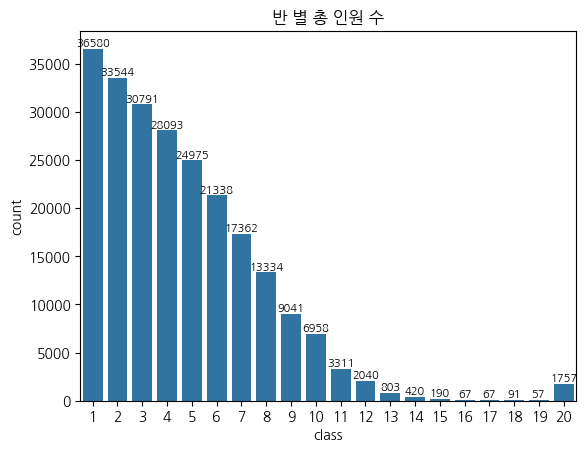

In [26]:
ax = sns.countplot(data=user_properties, x='class')
ax.bar_label(ax.containers[0], fontsize=8)
ax.set_title('반 별 총 인원 수')
plt.show()

In [83]:
max_class = user_properties.groupby('school_id')['class'].max().reset_index(name='max_class')

In [71]:
# set은 중복값을 자동으로 없애주니
# 먼저 set으로 만들고 나중에 list로 바꾸기
class_list = user_properties.groupby('school_id')['class'].apply(set).reset_index(name='class_list')
class_list['class_list'] = class_list['class_list'].apply(list)
class_list

,school_id,class_list
0,1,"[1, 2, 3, 10, 20]"
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]"
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]"
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]"
4,7,"[1, 2, 3, 4, 5, 6, 7]"
...,...,...
5018,5959,[1]
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5020,5961,"[1, 2, 3, 4, 5, 6]"
5021,5963,"[1, 4]"


In [84]:
school_info = pd.merge(class_list, max_class, on='school_id', how='left')
school_info

,school_id,class_list,max_class
0,1,"[1, 2, 3, 10, 20]",20
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]",10
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]",8
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9
4,7,"[1, 2, 3, 4, 5, 6, 7]",7
...,...,...,...
5018,5959,[1],1
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12
5020,5961,"[1, 2, 3, 4, 5, 6]",6
5021,5963,"[1, 4]",4


In [115]:
# 학교 별 평균 반 차이 구하기 -> total 리스트에 저장
total = []
for i in range(len(school_info)):  
    cal = []
    for j in range(len(school_info['class_list'].iloc[i])):
        if j != 0:
            now_list = school_info['class_list'].iloc[i]
            minus = now_list[j] - now_list[j - 1]
            cal.append(abs(minus))  # 반 차이 절대값 해줌
    total.append(np.mean(cal))

d:\나\공부\데이터 분석\03_고급_프로젝트\code\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\나\공부\데이터 분석\03_고급_프로젝트\code\.venv\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [110]:
# 학교 별 반 구성, max 반 번호, 평균 반 차이를 구함
school_info['avg_class_diff'] = total
school_info

,school_id,class_list,max_class,avg_class_diff
0,1,"[1, 2, 3, 10, 20]",20,4.750
1,4,"[1, 2, 3, 4, 5, 6, 7, 8, 10]",10,1.125
2,5,"[1, 2, 3, 4, 5, 6, 7, 8]",8,1.000
3,6,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",9,1.000
4,7,"[1, 2, 3, 4, 5, 6, 7]",7,1.000
...,...,...,...,...
5018,5959,[1],1,NaN
5019,5960,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12,1.000
5020,5961,"[1, 2, 3, 4, 5, 6]",6,1.000
5021,5963,"[1, 4]",4,3.000


In [111]:
# 반이 한 개만 있는 학교는 반 차이가 NULL임.
# 어떻게 계산해야 할까??? 
# -> max_class 가 1인 학교는 1로 치환
# 나머지 학교는 우선 무시
school_info[school_info['avg_class_diff'].isnull()]['max_class'].value_counts().reset_index().sort_values(by='max_class')

,max_class,count
0,1,333
1,2,66
2,3,34
3,4,24
5,5,11
4,6,18
6,7,9
8,8,3
9,9,3
10,10,1


In [112]:
# max class 가 1인 학교의 평균 반차이를 1로 바꿔줌
school_info.loc[school_info['max_class'] == 1, 'avg_class_diff'] = 1

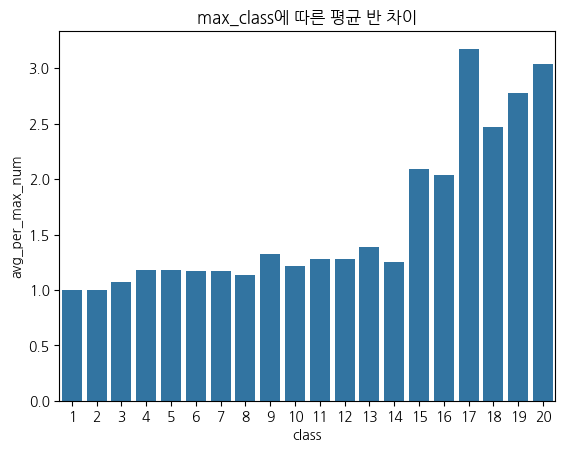

In [114]:
# max 반 번호마다의 평균 반 차이를 구함
# 높은 반 번호를 가질 수록 가짜 반일 확률이 높음
# 높은 반 번호일 수록 반 차이도 많이 날 것임 <- 가설
avg_per_max_num = []
for i in range(1, 21):
    avg = school_info[school_info['max_class'] == i]['avg_class_diff'].mean()
    avg_per_max_num.append(avg)

avg_per_max_df = pd.DataFrame({
    'class': np.arange(1, 21),
    'avg_per_max_num': avg_per_max_num
})

ax = sns.barplot(data=avg_per_max_df, x='class', y='avg_per_max_num')
ax.set_title('max_class에 따른 평균 반 차이')
plt.show()

[user_properties]
- 반이 20반까지 존재했음 (저출산 시대에 무슨 일)
- 학교 별 평균 반 차이를 구했더니 15반부터 수치가 크게 올라감
- <mark>15반 이상부터는 이상치가 확실하다고 볼 수 있을 듯 

## 2. votes

In [3]:
accounts_attendance = pd.read_csv('./dumps/votes_csv/accounts_attendance.csv')
accounts_blockrecord = pd.read_csv('./dumps/votes_csv/accounts_blockrecord.csv')
accounts_failpaymenthistory = pd.read_csv('./dumps/votes_csv/accounts_failpaymenthistory.csv')
accounts_friendrequest = pd.read_csv('./dumps/votes_csv/accounts_friendrequest.csv')

accounts_group = pd.read_csv('./dumps/votes_csv/accounts_group.csv')
accounts_nearbyschool = pd.read_csv('./dumps/votes_csv/accounts_nearbyschool.csv')
accounts_paymenthistory = pd.read_csv('./dumps/votes_csv/accounts_paymenthistory.csv')
accounts_pointhistory = pd.read_csv('./dumps/votes_csv/accounts_pointhistory.csv')

accounts_school = pd.read_csv('./dumps/votes_csv/accounts_school.csv')
accounts_timelinereport = pd.read_csv('./dumps/votes_csv/accounts_timelinereport.csv')
accounts_user_contacts = pd.read_csv('./dumps/votes_csv/accounts_user_contacts.csv')
accounts_user = pd.read_csv('./dumps/votes_csv/accounts_user.csv')

accounts_userquestionrecord = pd.read_csv('./dumps/votes_csv/accounts_userquestionrecord.csv')
accounts_userwithdraw = pd.read_csv('./dumps/votes_csv/accounts_userwithdraw.csv')
event_receipts = pd.read_csv('./dumps/votes_csv/event_receipts.csv')
events = pd.read_csv('./dumps/votes_csv/events.csv')

polls_question = pd.read_csv('./dumps/votes_csv/polls_question.csv')
polls_questionpiece = pd.read_csv('./dumps/votes_csv/polls_questionpiece.csv')
polls_questionreport = pd.read_csv('./dumps/votes_csv/polls_questionreport.csv')
polls_questionset = pd.read_csv('./dumps/votes_csv/polls_questionset.csv')
polls_usercandidate = pd.read_csv('./dumps/votes_csv/polls_usercandidate.csv')

### 2-1. accounts_user

In [99]:
accounts_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    677085 non-null  int64  
 1   is_superuser          677085 non-null  int64  
 2   is_staff              677085 non-null  int64  
 3   gender                677083 non-null  object 
 4   point                 677085 non-null  int64  
 5   friend_id_list        677085 non-null  object 
 6   is_push_on            677085 non-null  int64  
 7   created_at            677085 non-null  object 
 8   block_user_id_list    677085 non-null  object 
 9   hide_user_id_list     677085 non-null  object 
 10  ban_status            677085 non-null  object 
 11  report_count          677085 non-null  int64  
 12  alarm_count           677085 non-null  int64  
 13  pending_chat          677085 non-null  int64  
 14  pending_votes         677085 non-null  int64  
 15  

In [5]:
accounts_user.head(5)

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


- 결측값 확인

In [ ]:
# gender, group_id에 NULL 있음
accounts_user.isnull().sum()

id                    0
is_superuser          0
is_staff              0
gender                2
point                 0
friend_id_list        0
is_push_on            0
created_at            0
block_user_id_list    0
hide_user_id_list     0
ban_status            0
report_count          0
alarm_count           0
pending_chat          0
pending_votes         0
group_id              3
dtype: int64

In [ ]:
# NULL값인 유저들 2명 staff (gender, school_id 없음)
# 유저 1명은 school_id만 없네 -> 왜지?
accounts_user[accounts_user['group_id'].isnull()]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
138959,995177,0,0,F,600,[],1,2023-05-08 07:25:51.737820,[],[],N,0,0,0,0,NaN
674052,1580689,0,1,NaN,0,[],0,2023-09-24 17:39:12.897884,[],[],N,0,0,0,0,NaN


In [ ]:
# 2023-07-18 ~ 2023-08-10
# 이 기간에 안 들어왔나봄
hackle_properties[hackle_properties['user_id'] == '995177']

,id,session_id,user_id,language,osname,osversion,versionname,device_id


- 날짜 ns 제거

In [6]:
accounts_user['created_at'] = pd.to_datetime(accounts_user['created_at']).dt.floor('s')

In [ ]:
accounts_user['created_at'].min(), accounts_user['created_at'].max()

(Timestamp('2023-03-29 03:44:14'), Timestamp('2024-05-09 08:31:17'))

- 중복값 확인

In [7]:
columns = accounts_user.columns
columns = columns.drop('id')

# 중복값 없음 (id 제외)
# hackle에서 한 세션에서 여러 user_id가 발견됐었는데  
# 그냥 여러 친구들이 한 기종으로 로그인한듯 (추정)   
# 학교에서 폰 돌려보기?   
accounts_user[accounts_user[columns].duplicated(keep=False)]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id


- 친구 수 분포 확인

In [4]:
def friend_counts_status(x):
    if x > 1000:
        return ('1001 ~')
    elif x > 500 and x <= 1000:
        return ('501 ~ 1000')
    elif x > 300 and x <= 500:
        return ('301 ~ 500')
    elif x > 100 and x <= 300:
        return ('101 ~ 300')
    elif x > 70 and x <= 100:
        return ('71 ~ 100')
    elif x > 50 and x <= 70:
        return ('51 ~ 70')
    elif x > 30 and x <= 50:
        return ('31 ~ 50')
    elif x > 10 and x <= 30:
        return ('11 ~ 30')
    else:
        return ('~ 10')
    
# 친구 이상치 확인
accounts_user['friend_id_list'] = accounts_user['friend_id_list'].apply(lambda x: ast.literal_eval(x))
accounts_user['friend_counts'] = accounts_user['friend_id_list'].apply(lambda x: len(x))

friend_counts = accounts_user[['id', 'friend_counts']]
friend_counts['friend_counts_status'] = friend_counts['friend_counts'].apply(lambda x: friend_counts_status(x))
friend_counts = friend_counts['friend_counts_status'].value_counts().reset_index()
idx_map = {
    '1001 ~': 1, '501 ~ 1000': 2, '301 ~ 500': 3, '101 ~ 300': 4, 
    '71 ~ 100': 5, '51 ~ 70': 6, '31 ~ 50': 7, '11 ~ 30': 8, 
    '~ 10': 9
}

# 친구 300명 이상부터 거의 유저 없음
# 친구 1000여명 넘어가는 유저는 이상치인가?
friend_counts['idx'] = friend_counts['friend_counts_status'].map(idx_map)
friend_counts.sort_values(by='idx', inplace=True)
friend_counts[['friend_counts_status', 'count']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20844\2294836254.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friend_counts['friend_counts_status'] = friend_counts['friend_counts'].apply(lambda x: friend_counts_status(x))


,friend_counts_status,count
8,1001 ~,7
7,501 ~ 1000,24
6,301 ~ 500,137
4,101 ~ 300,51221
3,71 ~ 100,114473
1,51 ~ 70,153973
0,31 ~ 50,194029
2,11 ~ 30,129956
5,~ 10,33265


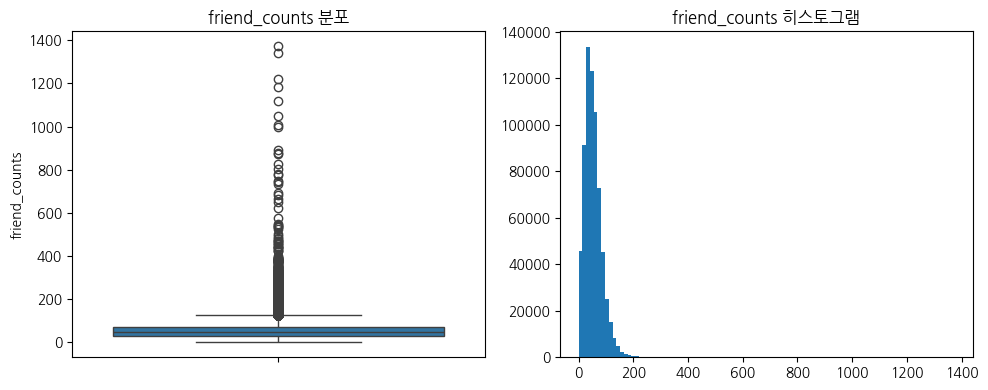

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes.flatten()

ax1 = sns.boxplot(data=accounts_user['friend_counts'], ax=ax1)
ax1.set_title('friend_counts 분포')

ax2.hist(accounts_user['friend_counts'], bins=100)
ax2.set_title('friend_counts 히스토그램')

plt.tight_layout()
plt.show()

- 친구 수 이상치 기준 분석

In [6]:
q3 = accounts_user['friend_counts'].quantile(0.75)
q1 = accounts_user['friend_counts'].quantile(0.25)
iqr = q3 - q1

upper_bound = q3 + iqr * 1.5

# 이상치 경계 upper에서 128.5가 나옴
# 이상치를 가진 유저들은 전체의 약 2.4%정도 됨
upper_bound

np.float64(128.5)

In [7]:
len(accounts_user[accounts_user['friend_counts'] >= 128.5]) / len(accounts_user) * 100

2.427317101988672

In [5]:
# 친구 1000여명 넘어가는 유저(7명) 중
# 정지 먹은 유저가 있음 (id: 1192441) -> 보류
# RB
accounts_user[accounts_user['friend_counts'] >= 1000]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_counts
23695,868174,0,0,M,630,"[870400, 864258, 862212, 856071, 864264, 86016...",1,2023-05-01 23:41:07.615008,[],"[866486, 862640, 847866, 843986, 851330, 85772...",N,0,1,0,85,6074.0,1007
48309,897681,0,0,F,3939,"[1017859, 872452, 866309, 911369, 1196044, 911...",1,2023-05-06 07:53:57.479563,[],[],N,0,3,3,12,15289.0,1184
284842,1153340,0,0,M,571,"[1507349, 1024021, 1081370, 1515549, 1040430, ...",1,2023-05-11 23:43:20.324071,[],[],N,0,1,0,76,32007.0,1222
320777,1192441,0,0,F,327,"[1239041, 1034243, 1302534, 1034246, 974854, 1...",0,2023-05-13 02:04:29.545930,[],"[1100163, 1373338, 1105293, 983615, 977407, 98...",W,0,0,0,0,18797.0,1048
468203,1353849,0,0,F,9790,"[1482776, 1531930, 1482782, 1376286, 1482784, ...",1,2023-05-17 12:44:11.946941,[],"[1214752, 1375694, 1267099, 1411812, 1331361, ...",N,0,1,3,642,44376.0,1341
630201,1533716,0,0,M,183,"[1458196, 1048608, 1024039, 876590, 1523762, 1...",1,2023-05-28 04:35:04.204408,[],"[1460720, 1468385, 1554914]",RB,0,0,0,0,80666.0,1373
638467,1542410,0,0,M,747,"[1058816, 1144835, 1193989, 1394694, 1517574, ...",1,2023-05-29 06:06:46.441808,[],[],N,0,1,0,58,51731.0,1117


- superuser 분석

In [6]:
# superuser인 유저 2명
# 그 중 한 명은 staff -> 이 사람은 제거 필요
# 나머지 한 명인 찐 superuser는 친구가 없네? -> 활동 패턴 확인 필요
accounts_user[accounts_user['is_superuser'] > 0]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_counts
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,6
673996,1580626,1,0,M,300,[],1,2023-09-23 06:11:32.028322,[],[],N,0,0,0,0,122.0,0


In [231]:
# superuser 행동패턴 보려고 했더니
# hackle 데이터에 없음 -> hackle 기간 동안 활동 안 함 -> 지금보니 가입시기가 9월 23일! 없을만도!

# superuser인데 친구, 질문 수도 없고,
# 회원가입 때 받은 포인트 300밖에 없는 신규가입자 위치에서 벗어나지 않은듯
hackle_properties[hackle_properties['user_id'] == '1580626']

,id,session_id,user_id,language,osname,osversion,versionname,device_id


In [ ]:
# superuser씨는 
# 출석도, 친구요청 활동도, 결제, 초대, 질문도 하지 않음
# 유령회원같음 -> staff ??
accounts_attendance[accounts_attendance['user_id'] == 1580626]
accounts_paymenthistory[accounts_paymenthistory['user_id'] == 1580626]

accounts_friendrequest[accounts_friendrequest['receive_user_id'] == 1580626] # 친구 요청받은 것도, 보낸 것도 없음
accounts_friendrequest[accounts_friendrequest['send_user_id'] == 1580626]

accounts_user_contacts[accounts_user_contacts['user_id'] == 1580626] 
accounts_user_contacts[accounts_user_contacts['invite_user_id_list'].apply(lambda x: '1580626' in x)] # 초대를 받지도, 초대를 하지도 않음
accounts_userquestionrecord[accounts_userquestionrecord['user_id'] == 1580626]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


In [27]:
accounts_school.rename(columns={'id': 'school_id'}, inplace=True)
school_total_info = pd.merge(accounts_group, accounts_school, on='school_id', how='left')

# superuser의 학교 정보도 없음
school_total_info[school_total_info['id']==122]

,id,grade,class_num,school_id,address,student_count,school_type
111,122,3,1,1,NaN,NaN,NaN


- staff 유저 분석

In [7]:
# staff인 유저 3명 -> 제거하면 될 듯
# staff 중 유일하게 친구를 만든 유저가 있네? (id: 831956)
# index가 0인 것으로 보아 정말 staff가 맞음 (또는 테스트 계정)
accounts_user[accounts_user['is_staff'] > 0]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_counts
0,831956,1,1,NaN,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,6
673997,1580627,0,1,M,300,[],1,2023-09-23 06:12:28.455787,[],[],N,0,0,0,0,122.0,0
674052,1580689,0,1,NaN,0,[],0,2023-09-24 17:39:12.897884,[],[],N,0,0,0,0,NaN,0


In [19]:
# 831956 staff도 아무런 활동 기록이 없음 (출석도, 친구요청 활동도, 결제, 초대, 질문도 하지 않음)
accounts_attendance[accounts_attendance['user_id'] == 831956]
accounts_paymenthistory[accounts_paymenthistory['user_id'] == 831956]

accounts_friendrequest[accounts_friendrequest['receive_user_id'] == 831956] # 친구 요청받은 것도, 보낸 것도 없음
accounts_friendrequest[accounts_friendrequest['send_user_id'] == 831956]

accounts_user_contacts[accounts_user_contacts['user_id'] == 831956] 
accounts_user_contacts[accounts_user_contacts['invite_user_id_list'].apply(lambda x: '831956' in x)] # 초대를 받지도, 초대를 하지도 않음
accounts_userquestionrecord[accounts_userquestionrecord['user_id'] == 831956]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times


In [8]:
# staff의 친구들은 뭘까
staff_friends = accounts_user.iloc[0]['friend_id_list']
accounts_user[accounts_user['id'].isin(staff_friends)]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_counts
62718,913158,0,0,F,1516,"[1137152, 1273091, 1132294, 1054471, 1354504, ...",0,2023-05-06 12:46:08.452942,[],[],N,0,1,0,124,17907.0,61
183567,1043565,0,0,F,2848,"[1233408, 1062913, 1390081, 1523201, 1287696, ...",1,2023-05-09 11:10:10.424976,[],[975319],N,0,4,3,351,36967.0,164
203076,1064695,0,0,F,4331,"[1274630, 1211656, 1506697, 1226891, 1210635, ...",1,2023-05-09 15:47:07.159232,[],[],N,0,4,0,1,39501.0,57
395957,1274736,0,0,M,737,"[1257475, 1272838, 1206279, 1550343, 1350155, ...",1,2023-05-15 01:01:48.077415,[],[],N,0,2,0,54,53119.0,123
412124,1292473,0,0,F,612,"[1070795, 831956, 1046540]",1,2023-05-15 13:02:31.862945,[],[],N,0,1,0,1,62370.0,3
589256,1488461,0,0,M,1675,"[1469312, 1477152, 1471395, 1402531, 1351096, ...",1,2023-05-24 08:00:07.083856,[],[1368047],N,0,2,0,5,76180.0,28


In [ ]:
# staff 친구 중 유일하게 친구수가 3밖에 안되는 유저가 있음 (id: 1292473)
# 이 사람도 활동 기록 아예 없음
# 친구 요청 기록 딱 1개만 있음
accounts_attendance[accounts_attendance['user_id'] == 1292473]
accounts_paymenthistory[accounts_paymenthistory['user_id'] == 1292473]
accounts_friendrequest[accounts_friendrequest['receive_user_id'] == 1292473]

accounts_user_contacts[accounts_user_contacts['user_id'] == 1292473] 
accounts_user_contacts[accounts_user_contacts['invite_user_id_list'].apply(lambda x: '1292473' in x)] # 초대를 받지도, 초대를 하지도 않음
accounts_userquestionrecord[accounts_userquestionrecord['user_id'] == 1292473]

accounts_friendrequest[accounts_friendrequest['send_user_id'] == 1292473]  # 친구 요청을 한 기록

,id,status,created_at,updated_at,receive_user_id,send_user_id
8698325,9953765,R,2023-05-15 13:03:00,2023-05-20 12:58:35,1097845,1292473


In [ ]:
# 1292473의 학교 정보
# 학교 정보가 있긴 하지만,
# 딱히 큰 특징은 없음
school_total_info[school_total_info['id'] == 62370]

,id,grade,class_num,school_id,address,student_count,school_type
62345,62370,3,7,335,충청남도 예산군,162.0,M


In [ ]:
# 1292473 유저가 유일하게 친구 요청을 한 
# 1097845 유저의 학교 정보
# 그냥 같은 학교 출신이라 친구였는 듯 -> 별 의미 없었음
accounts_user[accounts_user['id'] == 1097845]
school_total_info[school_total_info['id'] == 17907]

,id,grade,class_num,school_id,address,student_count,school_type
17888,17907,3,3,335,충청남도 예산군,162.0,M


- point 분포 및 이상치 분석

In [48]:
# point Top 5
accounts_user[['id', 'gender', 'point', 'is_push_on', 'friend_counts', 'group_id', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes']].sort_values(by='point', ascending=False).head(5)

,id,gender,point,is_push_on,friend_counts,group_id,report_count,alarm_count,pending_chat,pending_votes
12,833041,F,885000006,1,67,149.0,1,8,0,0
671675,1577938,M,23115730,1,41,1196.0,0,0,0,0
543379,1437875,M,9988541,1,86,1.0,1,201,3,17
8927,849763,M,9070657,1,44,78425.0,0,6,1,3
50,834358,F,600426,1,36,1.0,210,912,5712,28


In [18]:
# 출석 테이블의 출석일수 컬럼 추가
accounts_attendance['attendance_date_count'] = accounts_attendance['attendance_date_list'].apply(lambda x: len(ast.literal_eval(x)))
accounts_attendance

,id,attendance_date_list,user_id,attendance_date_count
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852,13
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398,33
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542,9
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767,30
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453,31
...,...,...,...,...
349632,360501,[],897005,0
349633,360502,"[""2024-05-09""]",1407059,1
349634,360503,"[""2024-05-09""]",1583727,1
349635,360504,"[""2024-05-09""]",1392372,1


In [9]:
# 친구 요청, 구매, 초대, 질문 기록을 담은 df를 만들어주는 함수
def user_action(user_list):
    user_info = []
    for i in user_list:
        friend_receive = len(accounts_friendrequest[accounts_friendrequest['receive_user_id'] == i]) # 친구 요청 받은 수
        friend_send = len(accounts_friendrequest[accounts_friendrequest['send_user_id'] == i]) # 친구 요청한 수

        pay = len(accounts_paymenthistory[accounts_paymenthistory['user_id'] == i]) # 구매 이력

        invite = len(accounts_user_contacts[accounts_user_contacts['invite_user_id_list'].apply(lambda x: 'i' in x)]) # 초대 보냄
        invited = len(accounts_user_contacts[accounts_user_contacts['contacts_count'] == i]) # 초대 받음

        question_set = len(polls_questionset[polls_questionset['user_id'] == i]) # 참여한 질문 세트 수
        question = len(accounts_userquestionrecord[accounts_userquestionrecord['user_id'] == i]) # 참여한 질문 수

        report = len(accounts_timelinereport[accounts_timelinereport['user_id'] == i]) # 신고함
        reported = len(accounts_timelinereport[accounts_timelinereport['reported_user_id'] == i]) # 신고 받음 

        user_info.append([friend_receive, friend_send, 
                          pay, invited, invite, question_set, 
                          question, report, reported])
        
        user_df = pd.DataFrame({'user_id': user_list.tolist()})
        data_df = pd.DataFrame(user_info, columns=['friend_receive', 'friend_send', 'pay', 'invite', 'invited',
                                                   'question_set', 'question', 'report', 'reported'])
        result = user_df.join(data_df)
    return result

In [ ]:
# point Top 5
# 제일 높은 포인트를 가진 유저의 하트 구매 -> 비싼 거(4000)로 2번이나 샀지만, 포인트가 너무 높다. -> 이상치 가능성

point_top10 = accounts_user.sort_values(by='point', ascending=False).head(10)[['id', 'point']]
point_top10.rename(columns={'id': 'user_id'}, inplace=True)

point_top10 = pd.merge(point_top10, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left')
data_df = user_action(point_top10['user_id'].unique())

pd.merge(point_top10, data_df, on='user_id', how='left')

,user_id,point,attendance_date_count,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,833041,885000006,53.0,26,35,2,0,0,0,0,0,0
1,1577938,23115730,0.0,3,39,1,0,0,0,0,0,0
2,1437875,9988541,3.0,50,51,0,0,0,0,0,0,0
3,849763,9070657,NaN,17,21,0,0,0,0,0,0,0
4,834358,600426,1.0,18,13,0,0,0,0,0,0,0
5,914589,274082,87.0,21,10,0,0,0,0,0,0,0
6,1563520,206081,1.0,11,41,1,0,0,0,0,0,0
7,1290502,135176,2.0,24,33,1,0,0,0,0,0,0
8,1484980,112451,158.0,12,33,0,0,0,0,0,0,0
9,1580470,109747,75.0,0,4,0,0,0,0,0,0,0


In [ ]:
hackle_properties[hackle_properties['user_id'] == '833041']

,id,session_id,user_id,language,osname,osversion,versionname,device_id
52941,52942,NnVWxmwjHcfnMENN9y4SrTPfcG82,833041,ko-KR,iOS,16.5.1,2.0.5,420F81D6-4206-4D72-B42D-207341327899
95976,95977,NnVWxmwjHcfnMENN9y4SrTPfcG82,833041,ko-KR,iOS,16.5.1,2.0.3,420F81D6-4206-4D72-B42D-207341327899


In [ ]:
# 딱히 특별한 이벤트 키가 없음 -> 그럼 어떻게 저렇게 모았을까 -> 일단 보류...
hackle_events[hackle_events['session_id'] == 'NnVWxmwjHcfnMENN9y4SrTPfcG82']['event_key'].unique()

array(['$session_start', 'view_timeline_tap', 'view_lab_tap',
       'click_attendance', 'click_bottom_navigation_lab', 'launch_app',
       'view_profile_tap', '$session_end', 'click_notice_detail',
       'click_bottom_navigation_profile',
       'click_bottom_navigation_questions', 'click_community_chat',
       'click_appbar_alarm_center', 'view_questions_tap'], dtype=object)

In [7]:
accounts_user['hide_user_count'] = accounts_user['hide_user_id_list'].apply(lambda x: len(ast.literal_eval(x)))
accounts_user['block_user_count'] = accounts_user['block_user_id_list'].apply(lambda x: len(ast.literal_eval(x)))

# 나머지 수치형 컬럼만 확인
columns = ['is_push_on', 'friend_counts', 'hide_user_count', 'block_user_count', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes']
accounts_user[columns].describe()

,is_push_on,friend_counts,hide_user_count,block_user_count,report_count,alarm_count,pending_chat,pending_votes
count,677085.000000,677085.000000,677085.000000,677085.000000,677085.000000,677085.000000,677085.000000,677085.000000
mean,0.843098,53.327700,0.764663,0.028552,0.037291,0.946646,0.098469,84.630518
std,0.363709,32.226571,13.935422,0.447539,0.588105,56.114858,11.087769,123.262688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,49.000000,0.000000,0.000000,0.000000,1.000000,0.000000,29.000000
75%,1.000000,70.000000,0.000000,0.000000,0.000000,1.000000,0.000000,122.000000
max,1.000000,1373.000000,3557.000000,178.000000,253.000000,40878.000000,5712.000000,3352.000000


- hide 유저 수 분포 및 이상치 분석

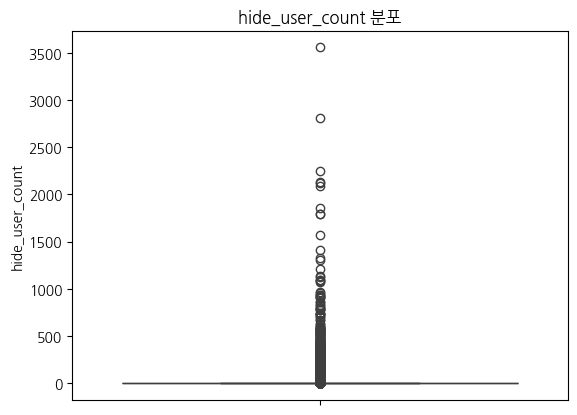

In [170]:
ax = sns.boxplot(data=accounts_user['hide_user_count'])
ax.set_title('hide_user_count 분포')
plt.show()

In [204]:
# 숨김 처리만 왕창 해놨네

over_2000_hide = accounts_user[accounts_user['hide_user_count'] > 2000][['id', 'hide_user_count', 'block_user_count', 'report_count', 'friend_counts', 'point']]
over_2000_hide.rename(columns={'id': 'user_id'}, inplace=True)

over_2000_hide = pd.merge(over_2000_hide, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='hide_user_count', ascending=False)
over_2000_hide

,user_id,hide_user_count,block_user_count,report_count,friend_counts,point,attendance_date_count
0,872528,3557,0,1,259,1333,2
1,872906,2810,0,0,98,803,11
4,1281555,2248,0,0,126,4793,14
2,1065693,2134,0,0,61,19,2
5,1495281,2121,0,0,422,554,3
3,1110125,2086,1,0,203,117,4


In [ ]:
hide_result = user_action(over_2000_hide['user_id'])

# 친목 활동만 했나봄
# 신고도 한번도 안했음
# 질문 기록이 없는데 포인트는 어케 많이 모았지
pd.merge(over_2000_hide[['user_id', 'hide_user_count', 'point']], hide_result, on='user_id', how='left')

,user_id,hide_user_count,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,872528,3557,1333,108,167,0,0,0,0,0,0,0
1,872906,2810,803,22,74,0,0,0,0,0,0,0
2,1281555,2248,4793,25,111,0,0,0,0,0,0,0
3,1065693,2134,19,10,48,1,0,0,0,0,0,0
4,1495281,2121,554,7,671,4,0,0,0,0,0,0
5,1110125,2086,117,34,196,0,0,0,0,0,0,0


- block 유저 수 분포 및 이상치 분석

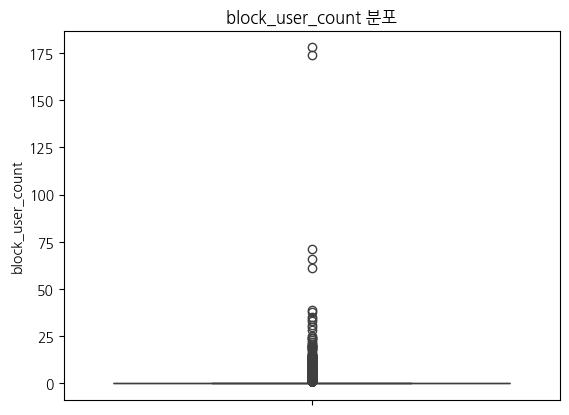

In [175]:
ax = sns.boxplot(data=accounts_user['block_user_count'])
ax.set_title('block_user_count 분포')
plt.show()

In [205]:
# 차단만 하고 친구는 없는 유저도 있음 (1등)
# 차단은 뭐 땜에 한거지

over_50_block = accounts_user[accounts_user['block_user_count'] > 50][['id', 'block_user_count', 'hide_user_count', 'report_count', 'friend_counts', 'point']]
over_50_block.rename(columns={'id': 'user_id'}, inplace=True)

over_50_block = pd.merge(over_50_block, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='block_user_count', ascending=False)
over_50_block

,user_id,block_user_count,hide_user_count,report_count,friend_counts,point,attendance_date_count
1,1415197,178,0,0,0,567,NaN
3,1526194,174,0,0,156,1097,NaN
2,1519819,71,0,0,5,3960,NaN
4,1542675,66,0,0,22,800,0.0
0,986459,61,42,0,88,2565,18.0


In [206]:
block_result = user_action(over_50_block['user_id'])

# 차단을 하면서 신고는 안했네
# 차단만 주구장창 한건가
# 아니면 조용히 차단만 하는 스타일?? -> 근데 질문 기록도 없는데 뭐지
pd.merge(over_50_block[['user_id', 'block_user_count', 'point']], block_result, on='user_id', how='left')

,user_id,block_user_count,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,1415197,178,567,1,0,0,0,0,0,0,0,0
1,1526194,174,1097,0,165,0,0,0,0,0,0,0
2,1519819,71,3960,7,1,0,0,0,0,0,0,0
3,1542675,66,800,10,12,0,0,0,0,0,0,0
4,986459,61,2565,19,14,0,0,0,0,0,0,0


- report 유저 수 분포 및 이상치 분석

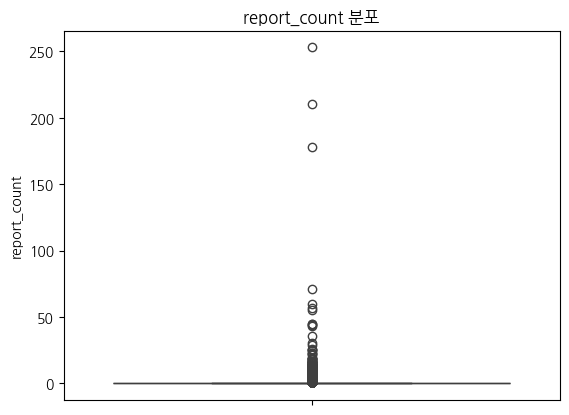

In [210]:
ax = sns.boxplot(data=accounts_user['report_count'])
ax.set_title('report_count 분포')
plt.show()

In [ ]:
# 신고 많이한 애들은 은근 출석을 많이 안 했네

over_50_report = accounts_user[accounts_user['report_count'] > 50][['id', 'report_count', 'block_user_count', 'hide_user_count', 'friend_counts', 'point']]
over_50_report.rename(columns={'id': 'user_id'}, inplace=True)

over_50_report = pd.merge(over_50_report, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='report_count', ascending=False)
over_50_report

,user_id,report_count,block_user_count,hide_user_count,friend_counts,point,attendance_date_count
0,831962,253,0,0,43,2248,NaN
1,834358,210,0,1,36,600426,1.0
2,838541,178,0,0,47,100404,1.0
6,1577954,71,0,0,48,99212,1.0
3,912951,60,0,7,79,3170,2.0
5,1443618,57,0,0,45,2702,13.0
4,1242094,55,0,0,99,287,1.0


In [ ]:
report_result = user_action(over_50_report['user_id'])

# 신고 횟수는 높은데
# 막상 신고한 기록은 안남았음
# 뭐지??
pd.merge(over_50_report[['user_id', 'report_count', 'point']], report_result, on='user_id', how='left')

,user_id,report_count,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,831962,253,2248,26,1,0,0,0,0,0,0,0
1,834358,210,600426,18,13,0,0,0,0,0,0,0
2,838541,178,100404,25,9,3,0,0,0,0,0,0
3,1577954,71,99212,10,39,0,0,0,0,0,0,0
4,912951,60,3170,51,33,0,0,0,0,0,0,0
5,1443618,57,2702,15,31,1,0,0,0,0,0,0
6,1242094,55,287,74,24,8,0,0,0,0,0,0


- alarm 유저 수 분포 및 이상치 분석

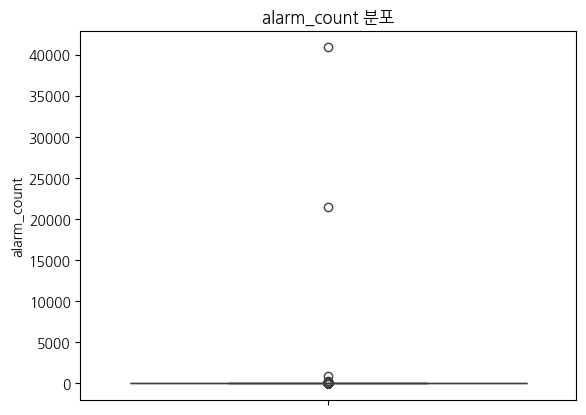

In [143]:
ax = sns.boxplot(data=accounts_user['alarm_count'])
ax.set_title('alarm_count 분포')
plt.show()

In [160]:
def alarm_range_cal(x):
        if x > 100:
            return ('101 ~')
        elif x > 50 and x <= 100:
            return ('51 ~ 100')
        elif x > 30 and x <= 50:
            return ('31 ~ 50')
        elif x > 10 and x <= 30:
            return ('11 ~ 30')
        else:
            return ('~ 10')


alarm_range = accounts_user[['id', 'alarm_count']]
alarm_range['alarm_range'] = alarm_range['alarm_count'].apply(lambda x: alarm_range_cal(x))
alarm_range_counts = alarm_range['alarm_range'].value_counts().reset_index()

alarm_range_idx = {'101 ~': 1, '51 ~ 100': 2, '31 ~ 50': 3, '11 ~ 30': 4, '~ 10': 5}
alarm_range_counts['idx'] = alarm_range_counts['alarm_range'].map(alarm_range_idx)

# 알람 횟수 분포도 확인
alarm_range_counts.sort_values(by='idx')[['alarm_range', 'count']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28492\2860308072.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alarm_range['alarm_range'] = alarm_range['alarm_count'].apply(lambda x: alarm_range_cal(x))


,alarm_range,count
3,101 ~,8
4,51 ~ 100,5
2,31 ~ 50,36
1,11 ~ 30,276
0,~ 10,676760


In [ ]:
# 알람 횟수 900회부터 확 뜀
# 채팅을 안 봐서 알람 수가 많아진 듯 (TOP3 유저들 해당)
# 1등은 출석 데이터에 존재조차 없네
# 제일 알람 기록이 많았던 유저는 staff를 제외한 첫 유저인 듯. index가 1번임

over_100_alarm = accounts_user[accounts_user['alarm_count'] > 100][['id', 'alarm_count', 'pending_chat', 'pending_votes', 'point']]
over_100_alarm.rename(columns={'id': 'user_id'}, inplace=True)

over_100_alarm = pd.merge(over_100_alarm, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='alarm_count', ascending=False)
over_100_alarm

,user_id,alarm_count,pending_chat,pending_votes,point,attendance_date_count
0,831962,40878,5499,110,2248,NaN
2,838541,21442,4105,28,100404,1.0
1,834358,912,5712,28,600426,1.0
5,1453061,238,0,29,67,0.0
4,1437875,201,3,17,9988541,3.0
3,1288533,119,0,263,526,1.0
7,1549094,111,4,547,27134,35.0
6,1505972,101,0,112,367,1.0


In [ ]:
alarm_result = user_action(over_100_alarm['user_id'])


# 아니 알람 기록이 그렇게 많이 왔는데
# 질문 기록이 왜 없지???????????????????
# 포인트 9백만개??????????
pd.merge(over_100_alarm[['user_id', 'alarm_count', 'point']], alarm_result, on='user_id', how='left')

,user_id,alarm_count,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,831962,40878,2248,26,1,0,0,0,0,0,0,0
1,838541,21442,100404,25,9,3,0,0,0,0,0,0
2,834358,912,600426,18,13,0,0,0,0,0,0,0
3,1453061,238,67,27,18,0,0,0,0,0,0,0
4,1437875,201,9988541,50,51,0,0,0,0,0,0,0
5,1288533,119,526,32,45,1,0,0,0,0,0,0
6,1549094,111,27134,15,15,0,0,0,0,0,0,0
7,1505972,101,367,9,24,0,0,0,0,0,0,0


- pending_chat 수 분포 및 이상치 분석

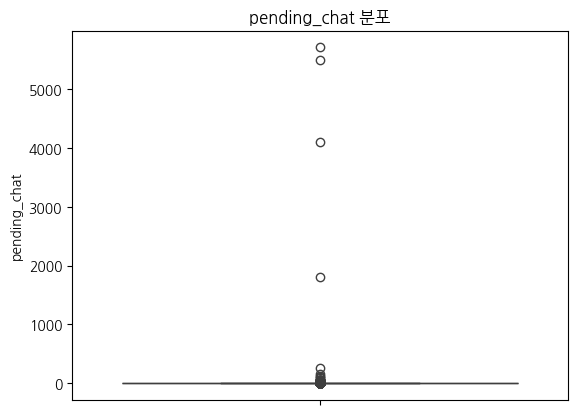

In [142]:
ax = sns.boxplot(data=accounts_user['pending_chat'])
ax.set_title('pending_chat 분포')
plt.show()

In [159]:
def pending_chat_range_cal(x):
        if x > 100:
            return ('101 ~')
        elif x > 50 and x <= 100:
            return ('51 ~ 100')
        elif x > 30 and x <= 50:
            return ('31 ~ 50')
        elif x > 10 and x <= 30:
            return ('11 ~ 30')
        else:
            return ('~ 10')


pending_chat_range = accounts_user[['id', 'pending_chat']]
pending_chat_range['pending_chat_range'] = pending_chat_range['pending_chat'].apply(lambda x: pending_chat_range_cal(x))
pending_chat_counts = pending_chat_range['pending_chat_range'].value_counts().reset_index()

pending_chat_idx = {'101 ~': 1, '51 ~ 100': 2, '31 ~ 50': 3, '11 ~ 30': 4, '~ 10': 5}
pending_chat_counts['idx'] = pending_chat_counts['pending_chat_range'].map(pending_chat_idx)

# 대기중인 채팅 수 분포도 확인
pending_chat_counts.sort_values(by='idx')[['pending_chat_range', 'count']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28492\2584499572.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pending_chat_range['pending_chat_range'] = pending_chat_range['pending_chat'].apply(lambda x: pending_chat_range_cal(x))


,pending_chat_range,count
3,101 ~,8
4,51 ~ 100,6
2,31 ~ 50,15
1,11 ~ 30,117
0,~ 10,676939


In [202]:
# 알람 TOP3 가 그대로 있음
# 이 3명의 유저는 활동을 접었거나 
# 채팅을 잘 보지 않는 타입이거나 
# 알람을 확인 안 하는 타입이거나
over_100_pending_chat = accounts_user[accounts_user['pending_chat'] > 100][['id', 'pending_chat', 'alarm_count', 'point']].sort_values(by='pending_chat', ascending=False)
over_100_pending_chat.rename(columns={'id': 'user_id'}, inplace=True)

over_100_pending_chat = pd.merge(over_100_pending_chat, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='pending_chat', ascending=False)
over_100_pending_chat

,user_id,pending_chat,alarm_count,point,attendance_date_count
0,834358,5712,912,600426,1.0
1,831962,5499,40878,2248,NaN
2,838541,4105,21442,100404,1.0
3,1577954,1801,21,99212,1.0
4,1548901,256,0,2166,7.0
5,960594,161,0,167,5.0
6,967372,116,1,4815,8.0
7,1003009,115,1,886,15.0


In [203]:
pending_chat_result = user_action(over_100_pending_chat['user_id'])

# 대기중인 채팅이 많은 유저들도
# 질문 기록이 없음
# 아니 왜ㅐㅐㅐㅐㅐㅐㅐ
pd.merge(over_100_pending_chat[['user_id', 'pending_chat', 'point']], pending_chat_result, on='user_id', how='left')

,user_id,pending_chat,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,834358,5712,600426,18,13,0,0,0,0,0,0,0
1,831962,5499,2248,26,1,0,0,0,0,0,0,0
2,838541,4105,100404,25,9,3,0,0,0,0,0,0
3,1577954,1801,99212,10,39,0,0,0,0,0,0,0
4,1548901,256,2166,4,69,0,0,0,0,0,0,0
5,960594,161,167,49,39,2,0,0,0,0,0,0
6,967372,116,4815,24,63,0,0,0,0,0,0,0
7,1003009,115,886,36,1,2,0,0,0,0,0,0


- pending_votes 수 분포 및 이상치 분석

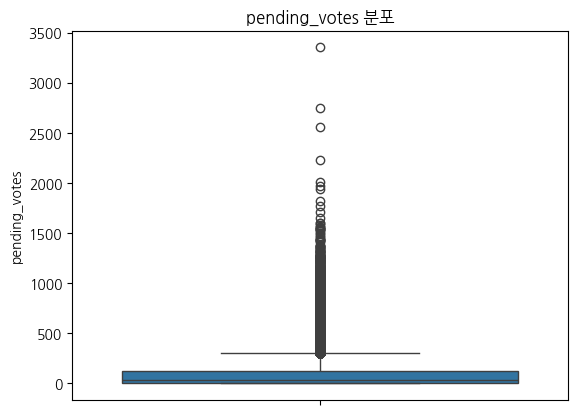

In [145]:
ax = sns.boxplot(data=accounts_user['pending_votes'])
ax.set_title('pending_votes 분포')
plt.show()

In [158]:
def pending_chat_range_cal(x):
        if x > 2000:
            return ('2001 ~')
        elif x > 1000 and x <= 2000:
            return ('1001 ~ 2000')
        elif x > 500 and x <= 1000:
            return ('501 ~ 1000')
        elif x > 300 and x <= 500:
            return ('301 ~ 500')
        elif x > 100 and x <= 300:
            return ('101 ~ 300')
        elif x > 50 and x <= 100:
            return ('51 ~ 100')
        elif x > 10 and x <= 50:
            return ('11 ~ 50')
        else:
            return ('~ 10')


pending_votes_range = accounts_user[['id', 'pending_votes']]
pending_votes_range['pending_votes_range'] = pending_votes_range['pending_votes'].apply(lambda x: pending_chat_range_cal(x))
pending_votes_counts = pending_votes_range['pending_votes_range'].value_counts().reset_index()

pending_votes_idx = {'2001 ~': 1, '1001 ~ 2000': 2, '501 ~ 1000': 3, '301 ~ 500': 4, '101 ~ 300': 5,
                     '51 ~ 100': 6, '11 ~ 50': 7, '~ 10': 8}
pending_votes_counts['idx'] = pending_votes_counts['pending_votes_range'].map(pending_votes_idx)

# 대기중인 채팅 수 분포도 확인
pending_votes_counts.sort_values(by='idx')[['pending_votes_range', 'count']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28492\745664462.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pending_votes_range['pending_votes_range'] = pending_votes_range['pending_votes'].apply(lambda x: pending_chat_range_cal(x))


,pending_votes_range,count
7,2001 ~,5
6,1001 ~ 2000,247
5,501 ~ 1000,9177
4,301 ~ 500,36215
1,101 ~ 300,151721
3,51 ~ 100,86344
2,11 ~ 50,135876
0,~ 10,257500


In [207]:
# pending_vote가 많아도 알람, 채팅 수에는 영향을 별로 안 주나?
# 여전히 출석 기록 조차 없는 유저가 있음 (1등)

over_100_pending_votes = accounts_user[accounts_user['pending_votes'] > 2000][['id', 'pending_votes', 'alarm_count', 'pending_chat', 'point']]
over_100_pending_votes.rename(columns={'id': 'user_id'}, inplace=True)

over_100_pending_votes = pd.merge(over_100_pending_votes, accounts_attendance[['user_id', 'attendance_date_count']], on='user_id', how='left').sort_values(by='pending_votes', ascending=False)
over_100_pending_votes

,user_id,pending_votes,alarm_count,pending_chat,point,attendance_date_count
0,1032279,3352,1,0,40830,NaN
3,1231896,2744,2,0,23986,1.0
4,1262996,2561,0,0,29497,6.0
2,1155373,2232,0,0,33850,18.0
1,1055839,2005,1,0,8043,1.0


In [208]:
pending_votes_result = user_action(over_100_pending_votes['user_id'])

# 왜 이렇게 질문 기록이 없지?!?!?!?
pd.merge(over_100_pending_votes[['user_id', 'pending_votes', 'point']], pending_votes_result, on='user_id', how='left')

,user_id,pending_votes,point,friend_receive,friend_send,pay,invite,invited,question_set,question,report,reported
0,1032279,3352,40830,64,247,0,0,0,0,0,0,0
1,1231896,2744,23986,182,26,0,0,0,0,0,0,0
2,1262996,2561,29497,147,38,0,0,0,0,0,0,0
3,1155373,2232,33850,17,20,0,0,0,0,0,0,0
4,1055839,2005,8043,90,86,0,0,0,0,0,0,0


In [ ]:
# 하도 활동기록들이 안나와서 테이블 별 유저수를 봐야겠음
# 얼마나 기록을 안했길래 각 컬럼별 상위권 유저들이 안나오는거지???

# accounts_friendrequest['receive_user_id']              친구 요청 받은 수
# accounts_friendrequest['send_user_id']                 친구 요청한 수
# accounts_paymenthistory['user_id']                     구매 이력
# accounts_user_contacts['invite_user_id_list']          초대 보냄
# accounts_user_contacts['contacts_count']               초대 받음
# polls_questionset['user_id']                           참여한 질문 세트 수
# accounts_userquestionrecord['user_id']                 참여한 질문 수
# accounts_timelinereport['user_id']                     신고함
# accounts_timelinereport['reported_user_id']            신고 받음 

In [ ]:
texts = ['친구 요청 받은 유저', '친구 요청한 유저', '구매 이력 유저', '초대 보낸 유저', '초대 기록에 있는 유저', 
           '참여한 질문 세트가 있는 유저', '참여한 질문이 있는 유저', '신고한 유저', '신고 받은 유저']

total_list = [len(accounts_friendrequest),
            len(accounts_friendrequest),            
            len(accounts_paymenthistory),                    
            len(accounts_user_contacts),       
            len(accounts_user_contacts),              
            len(polls_questionset),                  
            len(accounts_userquestionrecord),             
            len(accounts_timelinereport),                  
            len(accounts_timelinereport)]

data_list = [accounts_friendrequest['receive_user_id'].nunique(),
            accounts_friendrequest['send_user_id'].nunique(),            
            accounts_paymenthistory['user_id'].nunique(),                    
            accounts_user_contacts['invite_user_id_list'].apply(ast.literal_eval).explode().nunique(),       
            accounts_user_contacts['user_id'].nunique(),              
            polls_questionset['user_id'].nunique(),                  
            accounts_userquestionrecord['user_id'].nunique(),             
            accounts_timelinereport['user_id'].nunique(),                  
            accounts_timelinereport['reported_user_id'].nunique()]

check_num = pd.DataFrame({
    'text': texts, 
    'origin': total_list,
    'nunique': data_list
})

# 기록 인원이 너무 적어서 안 나올만 한건가?
# 기록은 왜 잘 안되어있을까
# 서버 문제?? 메모리 문제?? 진짜 활동을 많이 안한 것??
check_num['account_rate'] = check_num['nunique'] / len(accounts_user)
check_num

,text,origin,nunique,account_rate
0,친구 요청 받은 유저,17147175,660841,0.976009
1,친구 요청한 유저,17147175,649072,0.958627
2,구매 이력 유저,95140,59192,0.087422
3,초대 보낸 유저,5063,1122,0.001657
4,초대 기록에 있는 유저,5063,5063,0.007478
5,참여한 질문 세트가 있는 유저,158384,4972,0.007343
6,참여한 질문이 있는 유저,1217558,4849,0.007162
7,신고한 유저,208,115,0.000170
8,신고 받은 유저,208,125,0.000185


[account_user]
- <mark>id를 user_id로 미리 변경하면 다른 테이블과 merge하기 편할 듯
- 결측값 있지만 1명 빼고 모두 staff -> <mark>제거해도 될 듯   

	- 나머지 1명은 학교 기록이 없음 -> <mark>처리 방향 의논 필요
- superuser 중 일반기록, staff 기록 딱 1개씩 있음
	- superuser는 신규가입자마냥 활동기록이 없음 -> <mark>처리 방향 의논 필요
- 친구 수, 숨김처리 수, 차단 수, 신고 수, 알람 수, 채팅 대기 수, 질문 대시 수 모두 <mark>앱 활동기록이 0에 가까움   

	-> 알고보니, 활동 기록에 유저 수가 매우 적게 기록되어 있음   
	-> 서버 문제?? 메모리 문제?? 진짜 활동을 많이 안한 것??
- 포인트는 질문 완료 시 200p씩 받는다고 나와있지만(from. 피그마) 습득 기록이 명확하지 않음
- 그리고, 포인트의 이상치가 비정상적으로 높은 유저들이 존재    
	-> <mark>user_id 당 총 구매 금액보다 높으면 이상치로 볼지 or 그대로 놔둘지      

	-> <mark>처리 방향 의논 필요   

### 2-2. accounts_userquestionrecord

- 결측값 확인

In [20]:
# 결측값 없음
accounts_userquestionrecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1217558 non-null  int64 
 1   status             1217558 non-null  object
 2   created_at         1217558 non-null  object
 3   chosen_user_id     1217558 non-null  int64 
 4   question_id        1217558 non-null  int64 
 5   user_id            1217558 non-null  int64 
 6   question_piece_id  1217558 non-null  int64 
 7   has_read           1217558 non-null  int64 
 8   answer_status      1217558 non-null  object
 9   answer_updated_at  1217558 non-null  object
 10  report_count       1217558 non-null  int64 
 11  opened_times       1217558 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 111.5+ MB


In [21]:
accounts_userquestionrecord.head(5)

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


- 날짜 ns 제거

In [35]:
accounts_userquestionrecord['created_at'] = pd.to_datetime(accounts_userquestionrecord['created_at']).dt.floor('s')
accounts_userquestionrecord['created_at'].min(), accounts_userquestionrecord['created_at'].max()

(Timestamp('2023-04-28 12:27:49'), Timestamp('2024-05-08 01:36:18'))

- 중복값 확인

In [36]:
columns = accounts_userquestionrecord.columns
columns = columns.drop('id')

# 중복값 없음 (id 제외)
accounts_userquestionrecord[accounts_userquestionrecord[columns].duplicated(keep=False)]

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,answer_updated_date,answer_updated_time,answer_updated_KST


- 답변 시간대 그래프

In [23]:
# datetime형으로 바꾸기
accounts_userquestionrecord['answer_updated_at'] = pd.to_datetime(accounts_userquestionrecord['answer_updated_at'])

accounts_userquestionrecord['answer_updated_date'] = accounts_userquestionrecord['answer_updated_at'].dt.date
accounts_userquestionrecord['answer_updated_time'] = accounts_userquestionrecord['answer_updated_at'].dt.hour

Text(0.5, 1.0, '답변 완료 시간대')

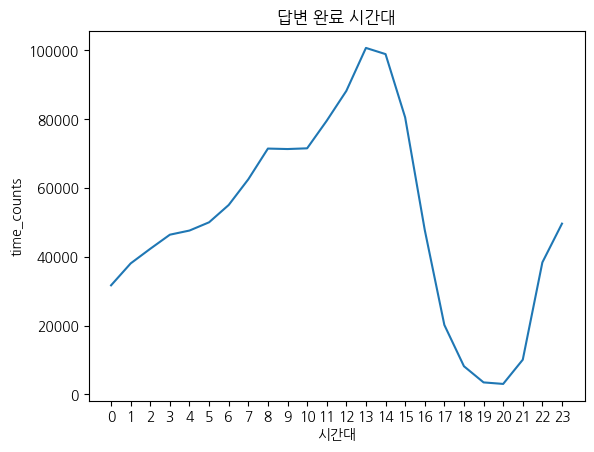

In [24]:
# 시간대 확인
# 확실히 한국인의 활동 시간대와는 다른 양상을 보인다
# 제일 활발해야 하는 저녁 시간대가 수치가 매우 낮음 -> UTC 시간대인 것으로 추정!
time_counts = accounts_userquestionrecord['answer_updated_time'].value_counts().reset_index(name='time_counts')
ax = sns.lineplot(data=time_counts, x='answer_updated_time', y='time_counts')
ax.set_xticks(range(0, 24))
ax.set_xlabel('시간대')
ax.set_title('답변 완료 시간대')

In [25]:
# KST시간대로 변경
accounts_userquestionrecord['answer_updated_KST'] = accounts_userquestionrecord['answer_updated_at'] + timedelta(hours=9)

accounts_userquestionrecord['answer_updated_date'] = accounts_userquestionrecord['answer_updated_KST'].dt.date
accounts_userquestionrecord['answer_updated_time'] = accounts_userquestionrecord['answer_updated_KST'].dt.hour

accounts_userquestionrecord[['answer_updated_at', 'answer_updated_KST', 'answer_updated_date', 'answer_updated_time']]

,answer_updated_at,answer_updated_KST,answer_updated_date,answer_updated_time
0,2023-04-28 12:27:49,2023-04-28 21:27:49,2023-04-28,21
1,2023-04-28 12:28:02,2023-04-28 21:28:02,2023-04-28,21
2,2023-04-28 12:28:09,2023-04-28 21:28:09,2023-04-28,21
3,2023-04-28 12:28:16,2023-04-28 21:28:16,2023-04-28,21
4,2023-04-28 12:28:26,2023-04-28 21:28:26,2023-04-28,21
...,...,...,...,...
1217553,2024-05-07 11:29:07,2024-05-07 20:29:07,2024-05-07,20
1217554,2024-05-08 01:34:56,2024-05-08 10:34:56,2024-05-08,10
1217555,2024-05-08 01:35:02,2024-05-08 10:35:02,2024-05-08,10
1217556,2024-05-08 01:36:00,2024-05-08 10:36:00,2024-05-08,10


Text(0.5, 1.0, '답변 완료 시간대(KST)')

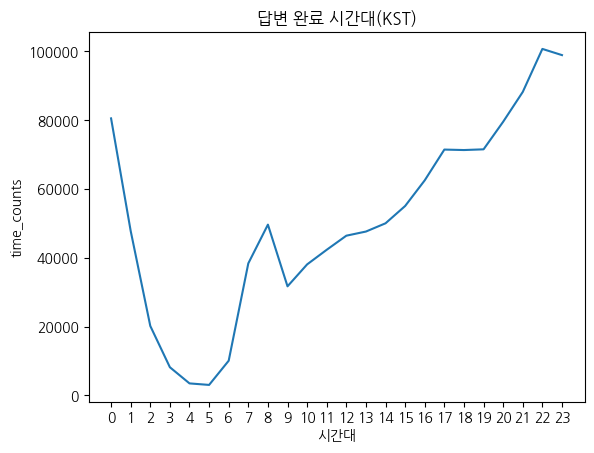

In [26]:
time_counts = accounts_userquestionrecord['answer_updated_time'].value_counts().reset_index(name='time_counts')

# 학교 등교하면서 잠깐 했다가
# 학교 수업 시간 시작(1교시 9시)에 맞춰서 확 사그러들었다
# 점점 증가하는 추세를 볼 수 있음
ax = sns.lineplot(data=time_counts, x='answer_updated_time', y='time_counts')
ax.set_xticks(range(0, 24))
ax.set_xlabel('시간대')
ax.set_title('답변 완료 시간대(KST)')

- has_read, answer_status 분석

In [27]:
cond1 = accounts_userquestionrecord['has_read'] == 0
cond2 = accounts_userquestionrecord['answer_status'] == 'N'

# 읽지도 않고, 답변도 하지 않았는데 선택된 유저 id에 NULL이 없음 -> 답변으로 채택된 유저들이 있다는 의미!
# has_read, answer_status는 채팅에 대한 내용이지 않을까? (추정)
accounts_userquestionrecord[cond1 | cond2]['chosen_user_id'].isnull().sum()

np.int64(0)

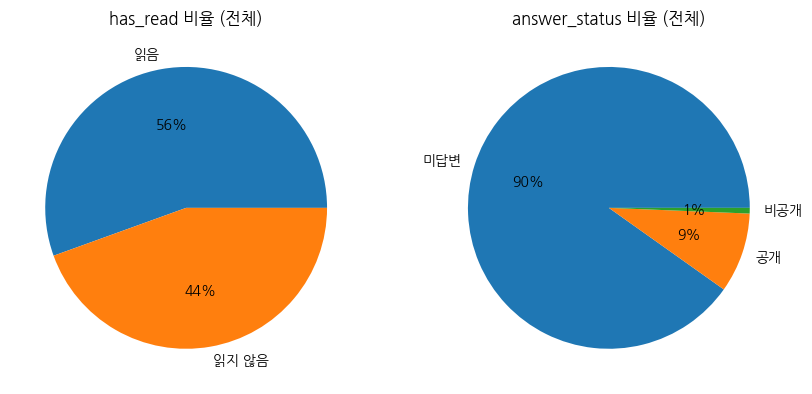

In [28]:
# has_read, answer_status 비율 확인
# 거의 대부분이 미답변, 절반 정도 읽지 않음 -> 질문에 대한 내용 아님!!
has_read_counts = accounts_userquestionrecord['has_read'].value_counts().reset_index()
has_read_map = {0: '읽지 않음', 1: '읽음'}
has_read_counts['has_read'] = has_read_counts['has_read'].map(has_read_map)

answer_status_counts = accounts_userquestionrecord['answer_status'].value_counts().reset_index()
answer_status_map = {'N': '미답변', 'P': '비공개', 'A': '공개'}
answer_status_counts['answer_status'] = answer_status_counts['answer_status'].map(answer_status_map)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes

ax1.pie(x=has_read_counts['count'], labels=has_read_counts['has_read'], autopct= '%.f%%', colors=sns.set_palette('pastel'))
ax1.set_title('has_read 비율 (전체)')

ax2.pie(x=answer_status_counts['count'], labels=answer_status_counts['answer_status'], autopct= '%.f%%', colors=sns.set_palette('pastel'))
ax2.set_title('answer_status 비율 (전체)')

plt.show()

- 초성 열은 질문 분석

In [29]:
# 뭐가 그렇게 흥미로운 질문이었길래 초성을 열었을까
# 호감을 드러내는 질문에 많은 관심을 보였음
# vote는 뭐지?? 커스텀 질문내용인가? -> 아닌거로!!
# 커스텀 질문들은 그냥 텍스트로 이미 포함되어 있다고 함! 

open_hint = accounts_userquestionrecord[accounts_userquestionrecord['status'] == 'I']
polls_question.rename(columns={'id': 'question_id'}, inplace=True) # id 컬럼명을 question_id로 바꿔줌
open_hint = pd.merge(open_hint, polls_question, on='question_id', how='left')
open_hint.isnull().sum() # merge하고서 결측치 없음

open_hint['question_text'].value_counts().reset_index()

,question_text,count
0,가장 친해지고 싶었던 사람은?,312
1,vote,293
2,"아직 잘 모르지만, 더 알아가 보고싶은 사람은?",279
3,내 생일에 꼭 연락왔으면 좋겠는 사람은?,231
4,자주 연락하면서 지내고 싶은 사람은?,228
...,...,...
2834,나에게 급한 일이 생겼을 때 가장 먼저 부르고 싶은 사람,1
2835,콘서트 티켓 2장이 있다면 같이 가고싶은 사람은?,1
2836,아무데서나 잘 잘 수 있을 것 같은 사람,1
2837,보면 가장 설레는 사람은?,1


In [30]:
# 전체 질문 활동 기록에서도 vote가 제일 많네
# vote는 뭐지...?  ->  보류
a = accounts_userquestionrecord['question_id'].value_counts().reset_index()
a = pd.merge(accounts_userquestionrecord, polls_question, on='question_id', how='left')
a['question_text'].value_counts().reset_index()

,question_text,count
0,vote,9695
1,2세가 가장 귀여울 것 같은 사람은?,2171
2,같이 캠핑가고 싶은 사람은?,2122
3,라면 잘 끓일 것 같은 사람은?,2114
4,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,1996
...,...,...
3897,한번쯤 목마를 태워주고 싶은사람은?,4
3898,떨어져 있어도 같이 있는 것 같은 사람은?,4
3899,"할머니, 할아버지가 돼도 이 친구만큼은 연락하고 지낼 것 같아!",1
3900,사달라는거 다 사줄 것 같은 사람은?,1


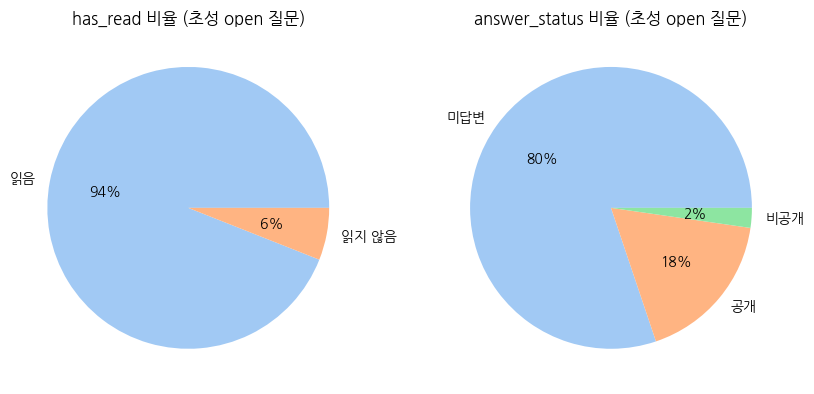

In [31]:
# 확실히 초성을 확인한 유저들의 채팅 활동성이 높았음
# status = C, B를 확인한 결과 
# has_read의 비율은 반반이었고, 미답변 비율은 90%가 넘어감

has_read_counts = open_hint['has_read'].value_counts().reset_index()
has_read_map = {0: '읽지 않음', 1: '읽음'}
has_read_counts['has_read'] = has_read_counts['has_read'].map(has_read_map)

answer_status_counts = open_hint['answer_status'].value_counts().reset_index()
answer_status_map = {'N': '미답변', 'P': '비공개', 'A': '공개'}
answer_status_counts['answer_status'] = answer_status_counts['answer_status'].map(answer_status_map)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes

ax1.pie(x=has_read_counts['count'], labels=has_read_counts['has_read'], autopct= '%.f%%', colors=sns.set_palette('pastel'))
ax1.set_title('has_read 비율 (초성 open 질문)')

ax2.pie(x=answer_status_counts['count'], labels=answer_status_counts['answer_status'], autopct= '%.f%%', colors=sns.set_palette('pastel'))
ax2.set_title('answer_status 비율 (초성 open 질문)')

plt.show()

In [32]:
# 최대 3번까지 같은 질문을 열었음 -> 이상치 없음
accounts_userquestionrecord['opened_times'].max()

# 초성을 연 질문들은 유저의 관심도가 높음
accounts_userquestionrecord.groupby('status')['opened_times'].mean().reset_index()

,status,opened_times
0,B,0.182371
1,C,0.000000
2,I,1.270791


- 신고횟수 분석

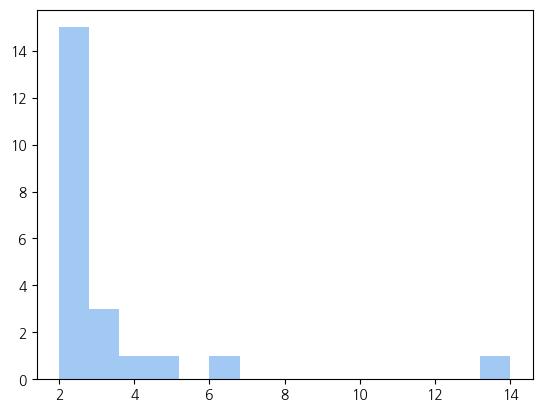

In [33]:
# 신고횟수는 0, 1에 몰려있음
# 2번 이상부터는 거의 없음
# 밑의 히스토그램은 2 이상부터 일부터 잘라서 봄 (0, 1 포함하면 안보여서)
plt.hist(x=accounts_userquestionrecord[accounts_userquestionrecord['report_count'] > 1]['report_count'], bins=15)
plt.show()

In [34]:
# 신고횟수 최대 14번 -> 이상치인가?
# 신고 내용 확인
max_userquestionrecord = accounts_userquestionrecord[accounts_userquestionrecord['report_count'] == 14]
max_userquestionrecord_id = max_userquestionrecord['id'].unique()
a = accounts_timelinereport[accounts_timelinereport['user_question_record_id'].isin(max_userquestionrecord_id)]

max_userquestionrecord.rename(columns={'id': 'user_question_record_id'}, inplace=True)
a = pd.merge(a[['reason', 'created_at', 'reported_user_id', 'user_id', 'user_question_record_id']], 
             max_userquestionrecord[['user_question_record_id', 'status', 'chosen_user_id', 'user_id', 'question_id', 'has_read', 'answer_status', 'opened_times']], 
             on='user_question_record_id', how='left')
a = pd.merge(a[['reason', 'created_at', 'reported_user_id', 'user_id_x', 'status', 'chosen_user_id', 'user_id_y', 'question_id', 'has_read', 'answer_status', 'opened_times']], 
             polls_question[['question_id', 'question_text']], 
             on='question_id', how='left')
a.rename(columns={'reported_user_id': '신고받은 사람', 'user_id_x': '신고한 사람', 
                  'chosen_user_id': '질문 채택된 사람', 'user_id_y': '답변한 사람'}, inplace=True)

# 질문 답변한 사람이 오히려 신고했음 (신고 당한게 아님!)
# 질문 오픈 횟수는 0번이고,
# 채팅 읽음, 답변 공개한 내용을 보아
# 채팅으로 둘이 얘기하다가 신고한 듯   ->   14번 신고는 이상치가 아닌거로!
a

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_29884\2780348329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_userquestionrecord.rename(columns={'id': 'user_question_record_id'}, inplace=True)


,reason,created_at,신고받은 사람,신고한 사람,status,질문 채택된 사람,답변한 사람,question_id,has_read,answer_status,opened_times,question_text
0,친구를 비하하거나 조롱하는 어투,2023-05-19 15:26:49,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
1,친구를 비하하거나 조롱하는 어투,2023-05-19 17:03:58,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
2,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:39,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
3,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:42,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
4,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:45,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
5,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:48,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
6,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:50,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
7,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:54,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
8,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:56,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?
9,친구를 비하하거나 조롱하는 어투,2023-05-19 17:05:58,1138757,1343904,C,1138757,1343904,1137,1,A,0,시험기간에 더 열심히 놀 것 같은 사람은?


[accounts_userquestionrecord]
- 시간대가 UTC로 되어있음 -> <mark>KST로 변경해야 할 듯
- has_read, answer_status는 질문에 대한 컬럼이 아니라 채팅에 대한 내용으로 추정
- 질문자 힌트를 사용한 유저들의 채팅 활동성이 높았음
- 한 사람이 동일인물을 여러번 신고 가능
- 제일 많이 신고한 질문과 질문자, 답변자를 분석한 결과 채팅 과정에서 이루어진 것으로 보임 -> <mark>신고 수 이상치로 보기는 힘듦 

### 2-3. accounts_userwithdraw

In [107]:
accounts_userwithdraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          70764 non-null  int64 
 1   reason      70764 non-null  object
 2   created_at  70764 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [108]:
accounts_userwithdraw.head(5)

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19


- 결측값 확인

In [ ]:
# 결측값 없음
accounts_userwithdraw.isnull().sum()

id            0
reason        0
created_at    0
dtype: int64

- 날짜 ns 제외

In [37]:
accounts_userwithdraw['created_at'] = pd.to_datetime(accounts_userwithdraw['created_at']).dt.floor('s')
accounts_userwithdraw['created_at'].min(), accounts_userwithdraw['created_at'].max()

(Timestamp('2023-03-29 13:22:12'), Timestamp('2024-05-09 08:49:06'))

- 중복값 확인

In [38]:
columns = accounts_userwithdraw.columns
columns = columns.drop('id')

accounts_userwithdraw[accounts_userwithdraw[columns].duplicated(keep=False)]

,id,reason,created_at
429,476,기타 이유,2023-04-22 23:37:14
430,477,기타 이유,2023-04-22 23:37:14
1989,2060,기타 이유,2023-04-30 10:42:13
1990,2061,기타 이유,2023-04-30 10:42:13
2142,2215,기타 이유,2023-04-30 13:46:47
...,...,...,...
58944,59074,기타 이유,2023-07-12 11:55:09
65622,65752,재밌는 질문이 없어서,2023-09-22 09:37:40
65623,65753,재밌는 질문이 없어서,2023-09-22 09:37:40
65710,65840,기타 이유,2023-09-23 10:56:19


In [39]:
accounts_userwithdraw[accounts_userwithdraw[columns].duplicated(keep='first')]

,id,reason,created_at
430,477,기타 이유,2023-04-22 23:37:14
1990,2061,기타 이유,2023-04-30 10:42:13
2143,2216,기타 이유,2023-04-30 13:46:47
2527,2600,기타 이유,2023-05-01 08:42:30
3478,3553,기타 이유,2023-05-03 08:36:43
...,...,...,...
53596,53723,버그가 너무 많아서,2023-06-16 10:45:40
55337,55464,기타 이유,2023-06-22 12:34:30
58944,59074,기타 이유,2023-07-12 11:55:09
65623,65753,재밌는 질문이 없어서,2023-09-22 09:37:40


In [40]:
# 최대 3번까지 찍힌 로그가 찍힘
a = accounts_userwithdraw[accounts_userwithdraw[columns].duplicated(keep=False)]
a.groupby(['reason', 'created_at'])['id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,reason,created_at,count
159,기타 이유,2023-05-15 12:19:44,3
71,기타 이유,2023-05-10 13:17:17,3
53,기타 이유,2023-05-09 13:53:38,3
353,함께 할 친구가 없어서,2023-05-22 04:19:37,3
4,기타 이유,2023-05-03 08:36:43,2
...,...,...,...
24,기타 이유,2023-05-07 12:22:39,2
25,기타 이유,2023-05-07 12:40:01,2
26,기타 이유,2023-05-07 13:45:26,2
27,기타 이유,2023-05-07 13:52:26,2


[accounts_userwithdraw]
- 중복값 있음 -> <mark>keep='first'로 보면 될듯

### 2-4. event_receipts & events

In [66]:
event_receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          309 non-null    int64 
 1   created_at  309 non-null    object
 2   event_id    309 non-null    int64 
 3   user_id     309 non-null    int64 
 4   plus_point  309 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.2+ KB


In [46]:
event_receipts.head(5)

,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500


- 결측치 확인

In [ ]:
# 결측치 없음
event_receipts.isnull().sum()

id            0
created_at    0
event_id      0
user_id       0
plus_point    0
dtype: int64

- 날짜 ns 제외

In [41]:
event_receipts['created_at'] = pd.to_datetime(event_receipts['created_at']).dt.floor('s')
event_receipts['created_at'].min(), event_receipts['created_at'].max()

(Timestamp('2023-06-22 09:25:16'), Timestamp('2023-11-21 12:03:02'))

- 중복값 확인

In [42]:
# 중복값 없음
columns = event_receipts.columns
columns = columns.drop('id')

event_receipts[event_receipts[columns].duplicated(keep=False)]

,id,created_at,event_id,user_id,plus_point


In [65]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_id    3 non-null      int64 
 1   title       3 non-null      object
 2   plus_point  3 non-null      int64 
 3   event_type  3 non-null      object
 4   is_expired  3 non-null      int64 
 5   created_at  3 non-null      object
dtypes: int64(3), object(3)
memory usage: 272.0+ bytes


In [77]:
events

,event_id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59


In [43]:
events['created_at'] = pd.to_datetime(events['created_at']).dt.floor('s')
events['created_at'].min(), events['created_at'].max()

(Timestamp('2023-06-20 11:56:38'), Timestamp('2023-09-24 17:05:59'))

In [ ]:
# id -> event_id로 컬럼명 변경
events.rename(columns={'id': 'event_id'}, inplace=True)

In [64]:
total_events = pd.merge(event_receipts, events[['event_id', 'title', 'event_type']], on='event_id', how='left')

# 합치면서 NULL 값 없음
total_events.isnull().sum()
total_events

,id,created_at,event_id,user_id,plus_point,title,event_type
0,2,2023-06-22 09:25:16,1,1193618,500,코드잇 은행 가입 이벤트,FCFS
1,3,2023-06-22 09:38:53,1,928351,500,코드잇 은행 가입 이벤트,FCFS
2,4,2023-06-22 10:32:15,1,904872,500,코드잇 은행 가입 이벤트,FCFS
3,5,2023-06-22 13:03:06,1,974697,500,코드잇 은행 가입 이벤트,FCFS
4,6,2023-06-22 13:40:38,1,1168260,500,코드잇 은행 가입 이벤트,FCFS
...,...,...,...,...,...,...,...
304,317,2023-11-14 11:17:29,3,918053,500,예고 영상 기대평 이벤트,FCFS
305,318,2023-11-15 05:09:02,3,932419,500,예고 영상 기대평 이벤트,FCFS
306,319,2023-11-17 06:17:25,3,1188104,500,예고 영상 기대평 이벤트,FCFS
307,320,2023-11-17 06:17:59,3,1296978,500,예고 영상 기대평 이벤트,FCFS


- 각 event 별 참여 시간 이상치 확인

In [104]:
# event_id = 1인 이벤트는
# 2023-06-22 ~ 2023-07-31 까지 진행

event_1 = total_events[total_events['event_id'] == 1]['created_at'].sort_values()
event_1.head(1), event_1.tail(1)

(0    2023-06-22 09:25:16
 Name: created_at, dtype: object,
 251    2023-07-31 14:45:34
 Name: created_at, dtype: object)

In [105]:
# 2023-08-08 ~ 2023-08-20
event_2 = total_events[total_events['event_id'] == 2]['created_at'].sort_values()
event_2.head(1), event_2.tail(1)

(252    2023-08-08 15:19:56
 Name: created_at, dtype: object,
 288    2023-08-20 16:28:20
 Name: created_at, dtype: object)

In [ ]:
# 3개의 이벤트 모두 이벤트 시작 시간 이전에 기록된 건 없음
# 2023-09-27 ~ 2023-11-21
event_3 = total_events[total_events['event_id'] == 3]['created_at'].sort_values()
event_3.head(1), event_3.tail(1)

(289    2023-09-27 06:17:44
 Name: created_at, dtype: object,
 308    2023-11-21 12:03:02
 Name: created_at, dtype: object)

In [101]:
event_per_user = total_events.groupby(['event_id', 'user_id'])['title'].count().reset_index(name='count').sort_values(by='count', ascending=False)
event_1 = event_per_user[event_per_user['event_id'] == 1] 
event_2 = event_per_user[event_per_user['event_id'] == 2]  
event_3 = event_per_user[event_per_user['event_id'] == 3]  

# 각 이벤트 별 참여한 인원 수
nums = [len(event_1), len(event_2), len(event_3)]

for i, num in zip(range(len(events)), nums):
    print(f'{events.iloc[i]["title"]}: {num}명')

코드잇 은행 가입 이벤트: 251명
코드잇 멤버십 가입 이벤트: 37명
예고 영상 기대평 이벤트: 20명


- event_type 고유값 확인

In [ ]:
# FCFS: 선착순 참여
total_events['event_type'].unique()

array(['FCFS'], dtype=object)

- event 참여 횟수 분포 확인

In [ ]:
# 한 이벤트를 2번 참여한 유저
accounts_user[accounts_user['id'] == 1577954]

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,friend_counts,friend_counts_status
671688,1577954,0,0,F,99212,"[838785, 982531, 882567, 879496, 838541, 83649...",1,2023-07-09 18:07:04.204081,[],[],N,71,21,1801,11,1.0,48,31 ~ 50


[event_receipts & events]
- <mark>id를 event_id로 변경하면 좋을 듯
- 참여 시간 이상치(이벤트 시작 전으로 찍힌 로그)는 없었음